DE CORDOUE-HECQUARD Grégoire 2508857

<div style="background-color: purple; padding: 10px;">
<h1 style ='color: white;'> Cars Data Exploration </h1>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set_theme()

df = pd.read_csv("Cars Datasets 2025 (cleaned).xls")
df.sample(3)

,Company,CarName,Horsepower_hp,MaxSpeed_kmph,Time_0_to_100_kmph_sec,Price_USD,FuelType,Seat,Torque_Nm,EngineDisplacement_cc,BatteryCapacity_kWh
1065,Mitsubishi,Space Star,78.0,170.0,12.0,15000.0,Petrol,5,100.0,1200.0,NaN
467,Nissan,200SX,200.0,240.0,7.2,30000.0,Petrol,4,265.0,1998.0,NaN
808,Kia,K5 EX,180.0,220.0,7.8,28500.0,Petrol,5,264.0,1591.0,NaN


<div style="background-color: blue; padding: 10px;">
<h2 style ='color: white;'> 1. Basic Descriptive & Distribution Analysis </h2>
</div>

### A. What is the distribution of car prices (show both histogram and boxplot)?

In [5]:
#by removing outliers
def remove_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df_remout = remove_outliers("Price_USD")
df_remout.shape


(1037, 11)

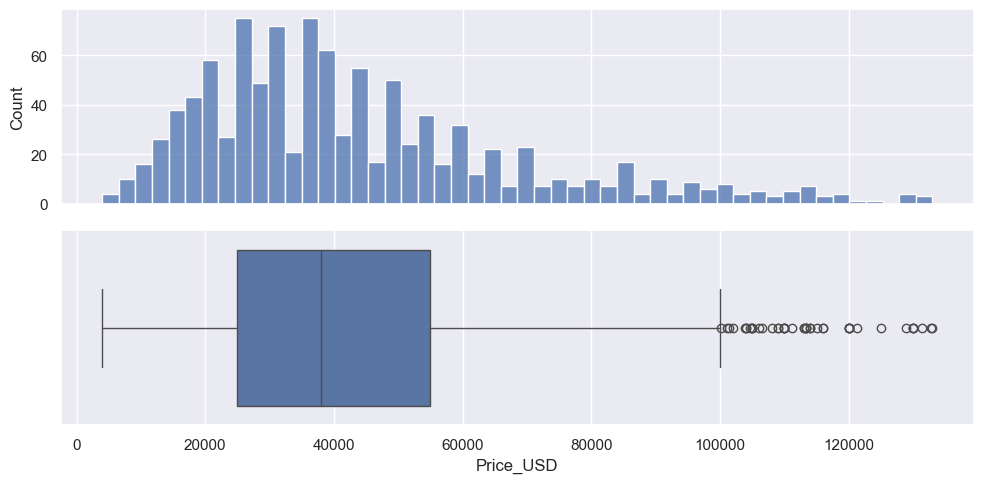

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 5))
sns.histplot(data=df_remout, x="Price_USD", bins=50, ax=ax[0])
sns.boxplot(data=df_remout, x="Price_USD", ax=ax[1])

plt.tight_layout()

### B. What is the distribution of horsepower, torque, top speed and acceleration?

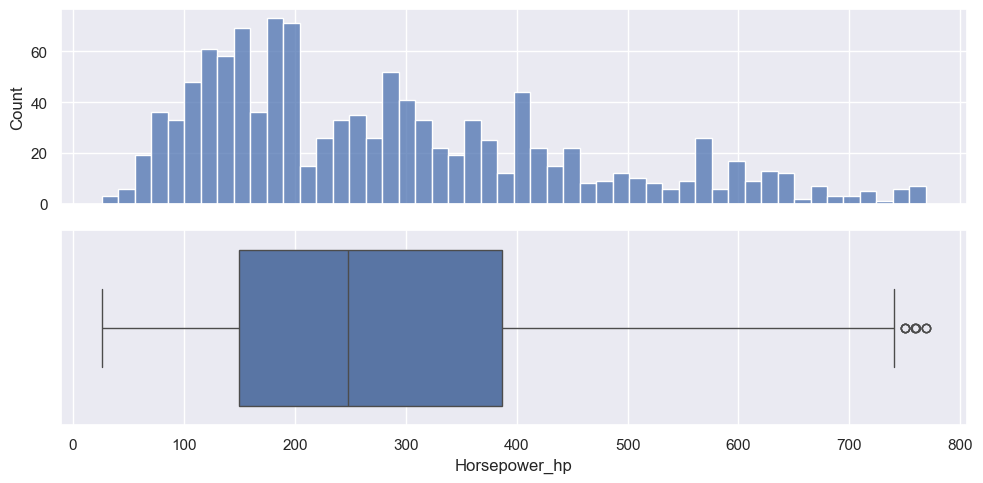

In [367]:
#Distribution of horsepower
df_remout = remove_outliers("Horsepower_hp")
df_remout.shape

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 5))
sns.histplot(data=df_remout, x="Horsepower_hp", bins=50, ax=ax[0])
sns.boxplot(data=df_remout, x="Horsepower_hp", ax=ax[1])

plt.tight_layout()

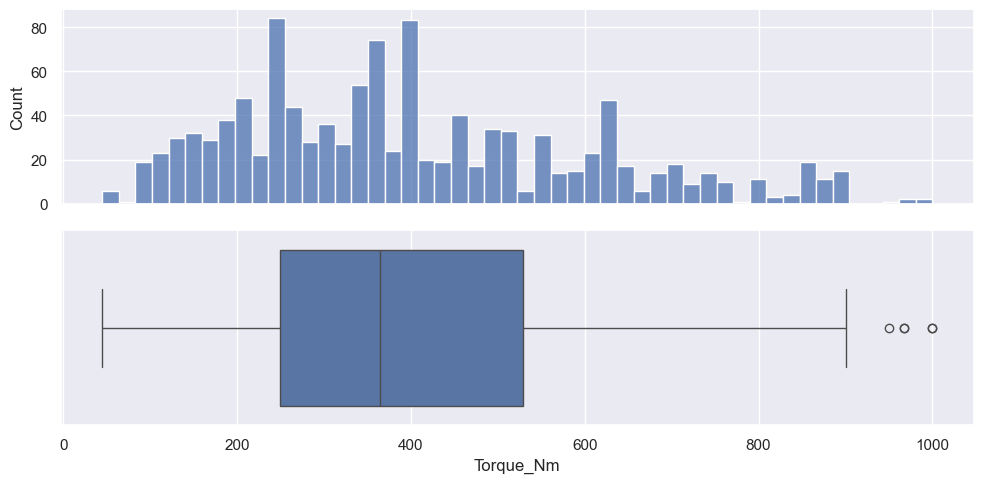

In [369]:
#Distribution of torque
df_remout = remove_outliers("Torque_Nm")
df_remout.shape

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 5))
sns.histplot(data=df_remout, x="Torque_Nm", bins=50, ax=ax[0])
sns.boxplot(data=df_remout, x="Torque_Nm", ax=ax[1])

plt.tight_layout()

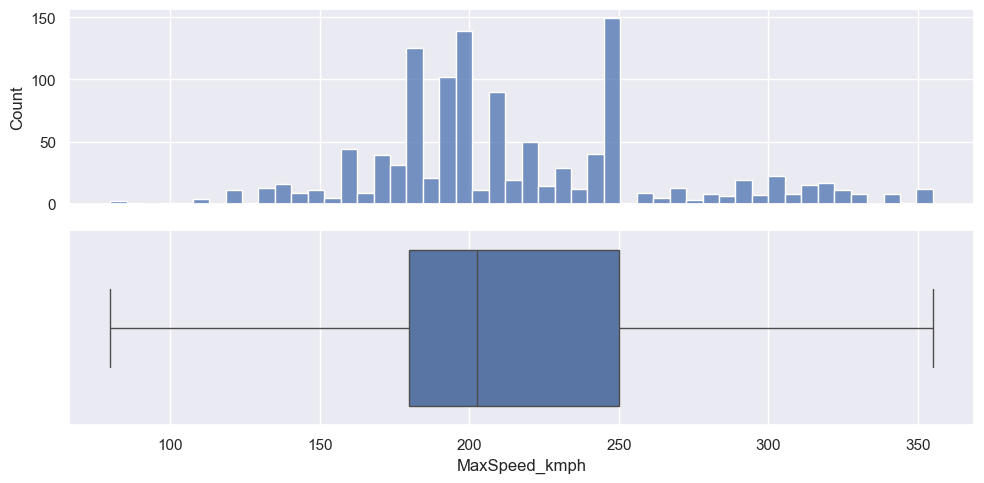

In [371]:
#Distribution of top speed
df_remout = remove_outliers("MaxSpeed_kmph")
df_remout.shape

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 5))
sns.histplot(data=df_remout, x="MaxSpeed_kmph", bins=50, ax=ax[0])
sns.boxplot(data=df_remout, x="MaxSpeed_kmph", ax=ax[1])

plt.tight_layout()

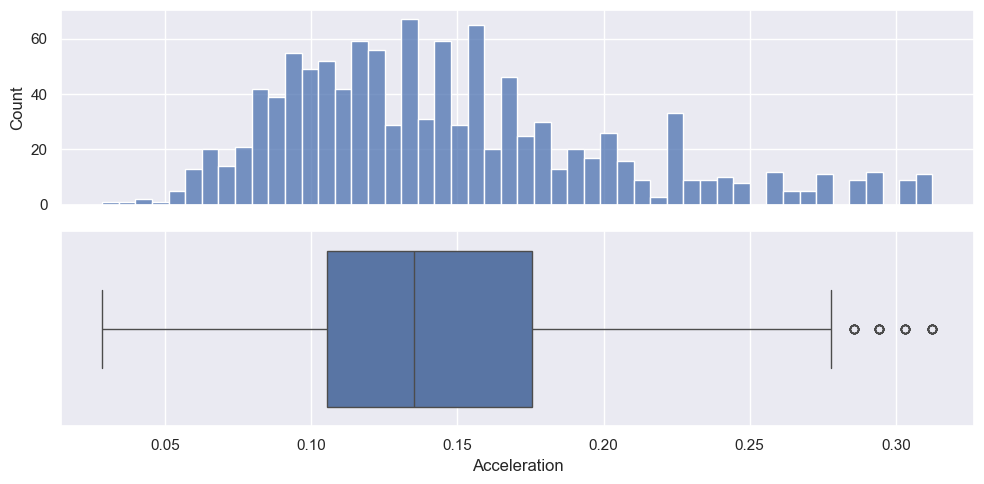

In [373]:
#Distribution of acceleration
df["Acceleration"] = 1/df["Time_0_to_100_kmph_sec"]
df_remout = remove_outliers("Acceleration")
df_remout.shape

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 5))
sns.histplot(data=df_remout, x="Acceleration", bins=50, ax=ax[0])
sns.boxplot(data=df_remout, x="Acceleration", ax=ax[1])

plt.tight_layout()

### C. How many cars belong to each fuel type (countplot)?

In [13]:
df["FuelType"].unique()

array(['Plug-in Hybrid', 'Petrol', 'Diesel', 'Hybrid', 'Electric',
       'Mixed Fuel', 'Hydrogen'], dtype=object)

In [14]:
df["FuelType"].value_counts()

FuelType
Petrol            874
Hybrid            102
Diesel             99
Electric           79
Mixed Fuel         21
Plug-in Hybrid      6
Hydrogen            3
Name: count, dtype: int64

<Axes: xlabel='FuelType', ylabel='count'>

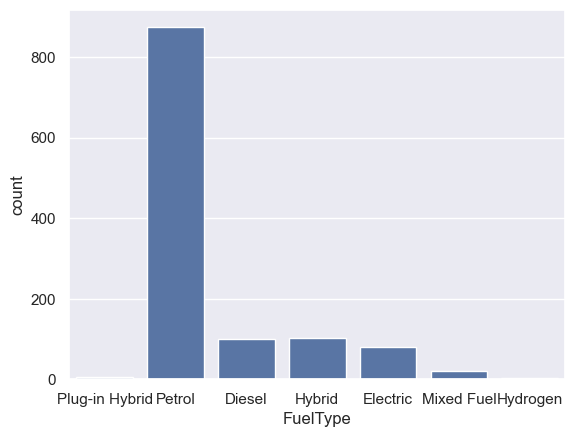

In [15]:
sns.countplot(data=df, x="FuelType")

### D. What is the frequency of companies in the dataset (i.e., how many models does each company have)?

In [17]:
df["Company"]=df["Company"].str.upper()
df.groupby(by="Company")["CarName"].count()

Company
ACURA                 27
ASTON MARTIN          11
AUDI                  21
BENTLEY                1
BMW                   41
BUGATTI               10
CADILLAC              20
CHEVROLET             58
FERRARI                9
FORD                  49
GMC                   51
HONDA                  7
HYUNDAI               23
JAGUAR LAND ROVER     40
JEEP                  19
KIA                   70
KIA                    1
LAMBORGHINI           24
MAHINDRA               3
MARUTI SUZUKI          3
MAZDA                 86
MERCEDES              20
MITSUBISHI            56
NISSAN               158
PEUGEOT               52
PORSCHE               96
ROLLS ROYCE           29
ROLLS ROYCE            1
TATA MOTORS           27
TESLA                  6
TOYOTA                45
VOLKSWAGEN           108
VOLVO                 12
Name: CarName, dtype: int64

### E. How many electric vs hybrid vs petrol cars are there?

In [19]:
nelec = len(df[(df["FuelType"]=="Electric")])
nhyb = len(df[(df["FuelType"]=="Hybrid")])
npetrol = len(df[(df["FuelType"]=="Petrol")])

print(f"There are {nelec} electric cars, {nhyb} hybrid cars and {npetrol} petrol cars.")

There are 79 electric cars, 102 hybrid cars and 874 petrol cars.


<div style="background-color: blue; padding: 10px;">
<h2 style ='color: white;'> 2. Comparison Analysis </h2>
</div>

### A. What is the average price of cars by fuel type?

In [22]:
df.groupby(by="FuelType")["Price_USD"].mean().round(2)

FuelType
Diesel             41171.21
Electric           62971.84
Hybrid            130614.36
Hydrogen           46633.33
Mixed Fuel         35223.81
Petrol            159804.54
Plug-in Hybrid    220683.33
Name: Price_USD, dtype: float64

### B. Compare horsepower, torque, and acceleration across fuel types.

In [24]:
#Comparing mean horsepowers
df.groupby(by="FuelType")["Horsepower_hp"].mean().round(2)

FuelType
Diesel            195.17
Electric          329.29
Hybrid            302.63
Hydrogen          154.67
Mixed Fuel        194.62
Petrol            308.91
Plug-in Hybrid    381.83
Name: Horsepower_hp, dtype: float64

In [25]:
#Comparing mean torque
df.groupby(by="FuelType")["Torque_Nm"].mean().round(2)

FuelType
Diesel            567.52
Electric          484.91
Hybrid            429.74
Hydrogen          356.67
Mixed Fuel        354.19
Petrol            413.13
Plug-in Hybrid    426.50
Name: Torque_Nm, dtype: float64

In [26]:
#Comparing mean acceleration
df.groupby(by="FuelType")["Acceleration"].mean().round(2)

FuelType
Diesel            0.09
Electric          0.18
Hybrid            0.16
Hydrogen          0.12
Mixed Fuel        0.12
Petrol            0.16
Plug-in Hybrid    0.18
Name: Acceleration, dtype: float64

### C. Which fuel type offers the most torque for the least battery capacity? (Use scatterplot of torque vs. battery capacity for each fuel type.)

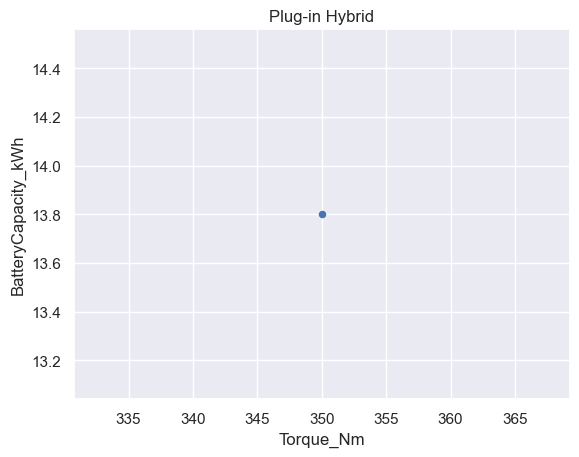

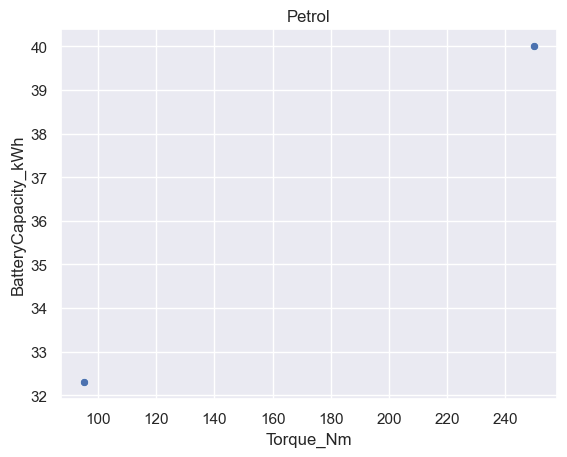

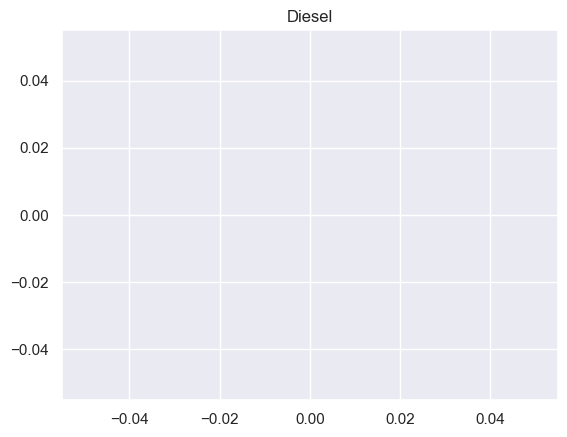

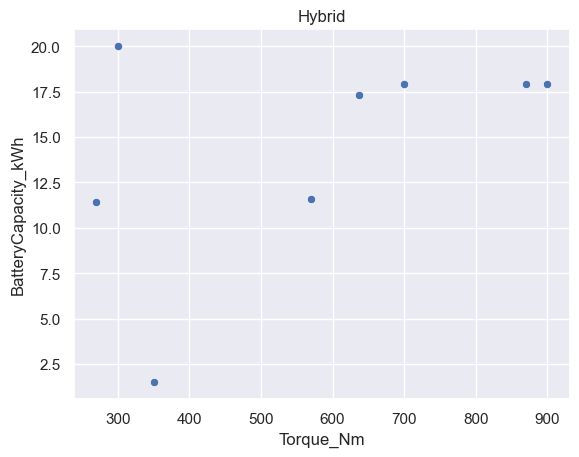

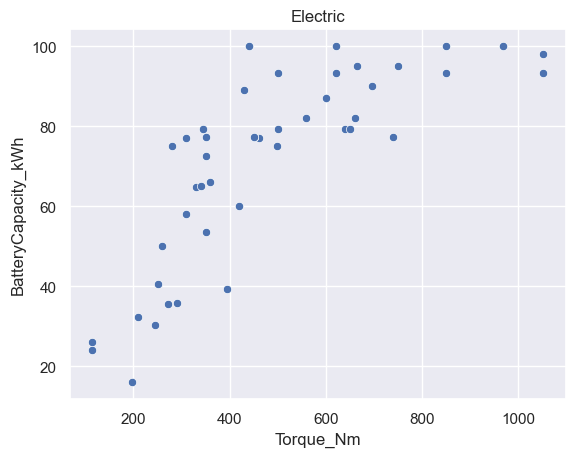

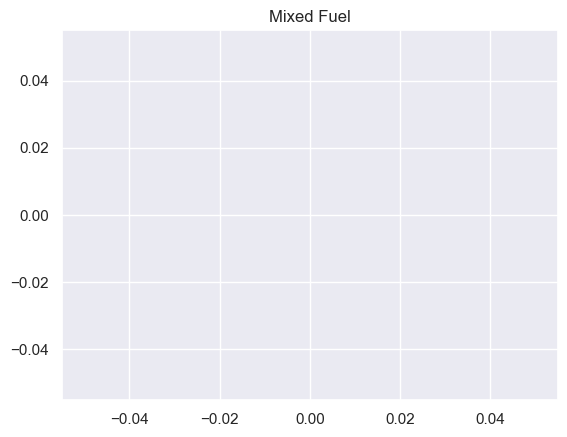

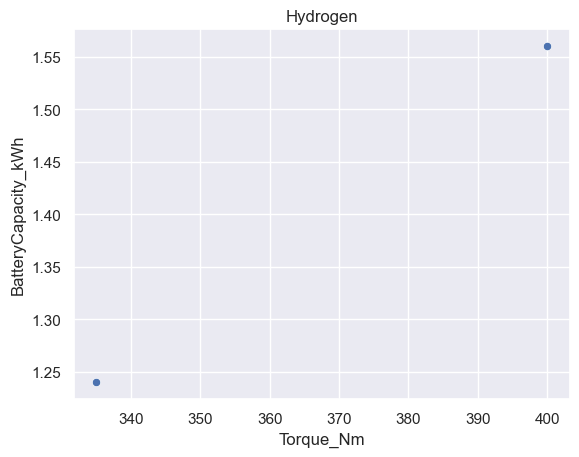

In [28]:
fuels = df["FuelType"].unique()
for fuel in fuels:
    plt.figure()
    plt.title(fuel)
    sns.scatterplot(data=df[(df["FuelType"]==fuel)], x="Torque_Nm", y="BatteryCapacity_kWh")
plt.show()

The hybrid cars seem to offer the most torque (350 Nm) for the least battery (1 kWh approximately).

### D. How do electric vs hybrid vs ICE (internal combustion engine) vehicles compare in acceleration?

In [30]:
df[(df["FuelType"]=="Electric") | (df["FuelType"]=="Hybrid") | (df["FuelType"]=="Petrol")].groupby(by="FuelType")["Acceleration"].mean().round(2)

FuelType
Electric    0.18
Hybrid      0.16
Petrol      0.16
Name: Acceleration, dtype: float64

<div style="background-color: blue; padding: 10px;">
<h2 style ='color: white;'> 3. Trend Analysis (specify bins) </h2>
</div>

### A. Is there a trend between horsepower and top speed?

In [33]:
df.dtypes

Company                    object
CarName                    object
Horsepower_hp             float64
MaxSpeed_kmph             float64
Time_0_to_100_kmph_sec    float64
Price_USD                 float64
FuelType                   object
Seat                        int64
Torque_Nm                 float64
EngineDisplacement_cc     float64
BatteryCapacity_kWh       float64
Acceleration              float64
dtype: object

<Axes: xlabel='Horsepower_hp', ylabel='MaxSpeed_kmph'>

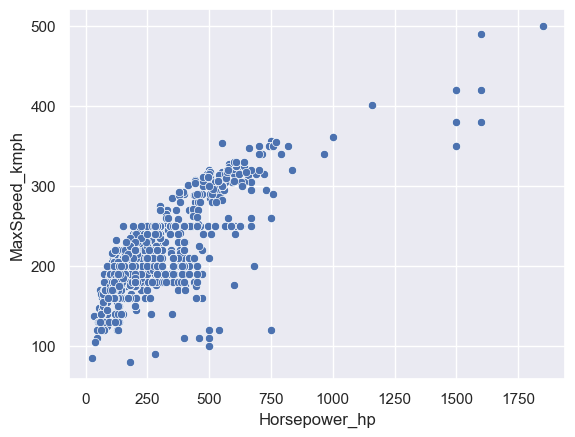

In [34]:
sns.scatterplot(data=df, x="Horsepower_hp", y="MaxSpeed_kmph")

In [35]:
bins = [0, 150, 300, 500, 1000, df["Horsepower_hp"].max()]

labels = "<150 150–300 300–500 500–1000 1000+".split()

df["Horsepower_hp_bins"] = pd.cut(x=df["Horsepower_hp"], bins=bins, labels=labels)
df.sample(5)

,Company,CarName,Horsepower_hp,MaxSpeed_kmph,Time_0_to_100_kmph_sec,Price_USD,FuelType,Seat,Torque_Nm,EngineDisplacement_cc,BatteryCapacity_kWh,Acceleration,Horsepower_hp_bins
258,HYUNDAI,KONA Electric,200.0,200.0,6.1,40000.0,Electric,5,395.0,NaN,39.2,0.163934,150–300
1115,MAZDA,BT-50,200.0,180.0,10.0,27000.0,Diesel,5,470.0,3200.0,NaN,0.100000,150–300
733,CHEVROLET,Traverse LT,310.0,210.0,7.1,37200.0,Petrol,7,360.0,3600.0,NaN,0.140845,300–500
914,JAGUAR LAND ROVER,Jaguar I-PACE First Edition,400.0,200.0,4.5,85000.0,Electric,5,696.0,NaN,90.0,0.222222,300–500
402,NISSAN,Pulsar,115.0,190.0,10.7,19000.0,Petrol,5,190.0,1197.0,NaN,0.093458,<150


<Axes: xlabel='Horsepower_hp_bins', ylabel='Median Speed (kmph)'>

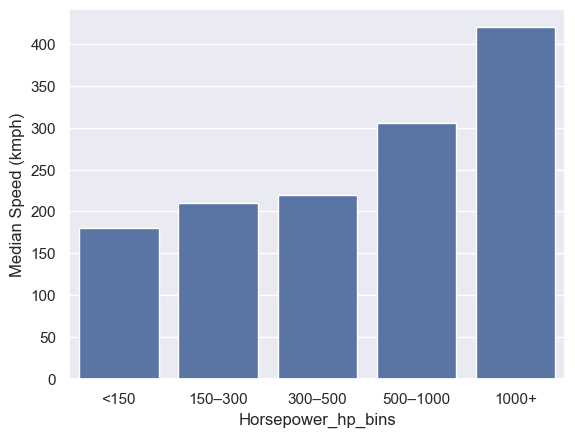

In [36]:
df_ = df.groupby(by="Horsepower_hp_bins", observed=False)["MaxSpeed_kmph"].median().reset_index(name="Median Speed (kmph)")
sns.barplot(data=df_, x="Horsepower_hp_bins", y="Median Speed (kmph)")

<Axes: xlabel='Horsepower_hp_bins', ylabel='Median Speed (kmph)'>

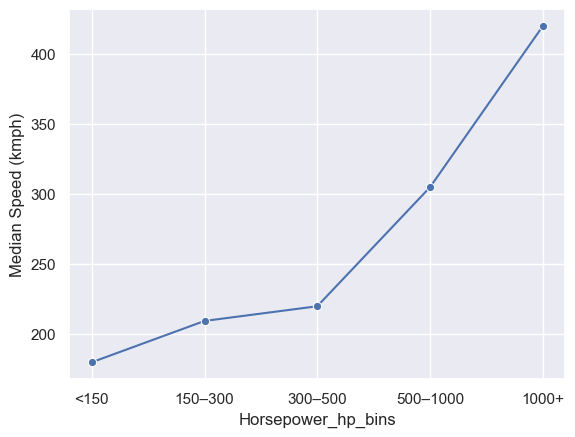

In [37]:
sns.lineplot(data=df_, x="Horsepower_hp_bins", y="Median Speed (kmph)", marker="o")

### B. How does battery capacity affect acceleration?

In [39]:
bins = [0, 50, 60, 90, df["BatteryCapacity_kWh"].max()]

labels = "<50 50–60 60–90 90+".split()

df["BatteryCapacity_kWh_bins"] = pd.cut(x=df["BatteryCapacity_kWh"], bins=bins, labels=labels)
df.sample(5)

,Company,CarName,Horsepower_hp,MaxSpeed_kmph,Time_0_to_100_kmph_sec,Price_USD,FuelType,Seat,Torque_Nm,EngineDisplacement_cc,BatteryCapacity_kWh,Acceleration,Horsepower_hp_bins,BatteryCapacity_kWh_bins
1064,MITSUBISHI,L200 Barbarian X,181.0,177.0,10.5,30000.0,Diesel,5,430.0,2400.0,NaN,0.095238,150–300,NaN
222,HYUNDAI,ELANTRA,147.0,200.0,9.5,18400.0,Hybrid,5,250.0,1999.0,NaN,0.105263,<150,NaN
125,AUDI,A8,335.0,250.0,5.7,86000.0,Petrol,5,600.0,2995.0,NaN,0.175439,300–500,NaN
546,PORSCHE,911 Carrera 4S,443.0,306.0,3.4,113300.0,Petrol,4,528.0,2981.0,NaN,0.294118,300–500,NaN
407,NISSAN,X-Trail Hybrid,179.0,180.0,9.4,28500.0,Hybrid,5,207.0,1997.0,NaN,0.106383,150–300,NaN


<Axes: xlabel='BatteryCapacity_kWh_bins', ylabel='Median Time 0 to 100'>

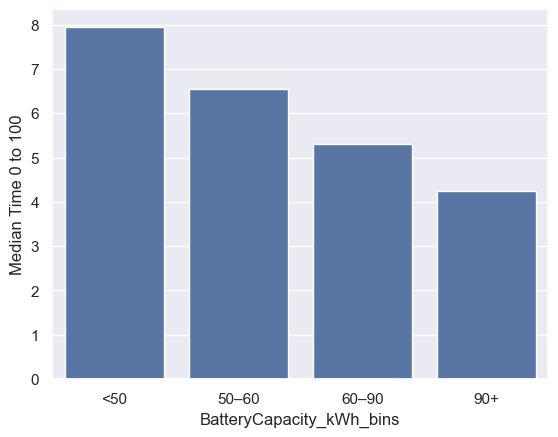

In [40]:
df_ = df.groupby(by="BatteryCapacity_kWh_bins", observed=False)["Time_0_to_100_kmph_sec"].median().reset_index(name="Median Time 0 to 100")
sns.barplot(data=df_, x="BatteryCapacity_kWh_bins", y="Median Time 0 to 100")

### C. Does price increase with engine capacity or battery capacity?

In [42]:
bins = [0, 1500, 2000, 3000, 4000, df["EngineDisplacement_cc"].max()]
bins2 = [0, 50, 60, 90, df["BatteryCapacity_kWh"].max()]


labels = "<1500 1500–2000 2000–3000 3000–4000 4000".split()
labels2 = "<50 50–60 60–90 90+".split()

df["EngineDisplacement_cc_bins"] = pd.cut(x=df["EngineDisplacement_cc"], bins=bins, labels=labels)
df["BatteryCapacity_kWh_bins"] = pd.cut(x=df["BatteryCapacity_kWh"], bins=bins2, labels=labels2)
df.sample(5)

,Company,CarName,Horsepower_hp,MaxSpeed_kmph,Time_0_to_100_kmph_sec,Price_USD,FuelType,Seat,Torque_Nm,EngineDisplacement_cc,BatteryCapacity_kWh,Acceleration,Horsepower_hp_bins,BatteryCapacity_kWh_bins,EngineDisplacement_cc_bins
178,KIA,SPORTAGE SX TURBO,240.0,210.0,6.7,36000.0,Petrol,5,400.0,1998.0,NaN,0.149254,150–300,NaN,1500–2000
1123,MAZDA,Eunos Cosmo,280.0,240.0,6.0,40000.0,Petrol,4,300.0,2000.0,NaN,0.166667,150–300,NaN,1500–2000
1103,MAZDA,CX-5,187.0,200.0,8.8,26000.0,Petrol,5,252.0,2500.0,NaN,0.113636,150–300,NaN,2000–3000
317,VOLKSWAGEN,Bora,100.0,200.0,9.4,20000.0,Petrol,5,220.0,1598.0,NaN,0.106383,<150,NaN,1500–2000
732,CHEVROLET,Spark LS,98.0,180.0,10.9,14395.0,Petrol,5,127.0,1400.0,NaN,0.091743,<150,NaN,<1500


<Axes: xlabel='EngineDisplacement_cc_bins', ylabel='Median Price'>

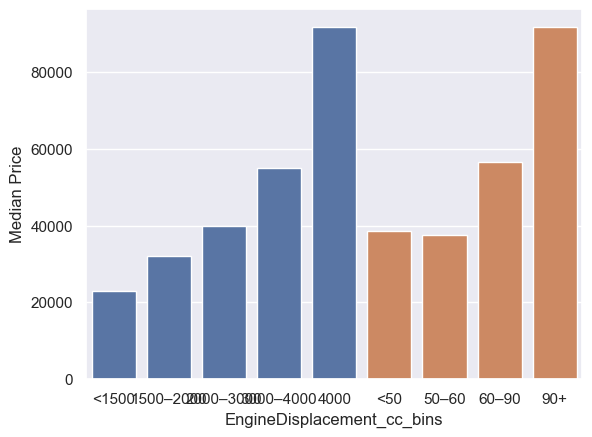

In [43]:
df_ = df.groupby(by="EngineDisplacement_cc_bins", observed=False)["Price_USD"].median().reset_index(name="Median Price")
sns.barplot(data=df_, x="EngineDisplacement_cc_bins", y="Median Price")

df_ = df.groupby(by="BatteryCapacity_kWh_bins", observed=False)["Price_USD"].median().reset_index(name="Median Price")
sns.barplot(data=df_, x="BatteryCapacity_kWh_bins", y="Median Price")

### D. How does torque correlate with acceleration?

In [45]:
bins = [0, 300, 500, 800, df["Torque_Nm"].max()]

labels = "<300 300–500 500–800 800+".split()

df["Torque_Nm_bins"] = pd.cut(x=df["Torque_Nm"], bins=bins, labels=labels)
df.sample(5)

,Company,CarName,Horsepower_hp,MaxSpeed_kmph,Time_0_to_100_kmph_sec,Price_USD,FuelType,Seat,Torque_Nm,EngineDisplacement_cc,BatteryCapacity_kWh,Acceleration,Horsepower_hp_bins,BatteryCapacity_kWh_bins,EngineDisplacement_cc_bins,Torque_Nm_bins
838,KIA,Seltos SX Turbo,175.0,210.0,7.5,32000.0,Petrol,5,264.0,1591.0,NaN,0.133333,150–300,NaN,1500–2000,<300
582,PORSCHE,Macan EV,603.0,240.0,4.0,85000.0,Electric,5,750.0,NaN,95.0,0.250000,500–1000,90+,NaN,500–800
382,NISSAN,Armada,400.0,210.0,6.5,51000.0,Petrol,8,560.0,5552.0,NaN,0.153846,300–500,NaN,4000,500–800
1026,FORD,Mustang Shelby GT350,526.0,280.0,4.0,59140.0,Petrol,2,582.0,5200.0,NaN,0.250000,500–1000,NaN,4000,500–800
243,TOYOTA,CENTURY SUV,406.0,200.0,6.0,170000.0,Petrol,5,500.0,3456.0,NaN,0.166667,300–500,NaN,3000–4000,300–500


<Axes: xlabel='Torque_Nm_bins', ylabel='Median Acceleration'>

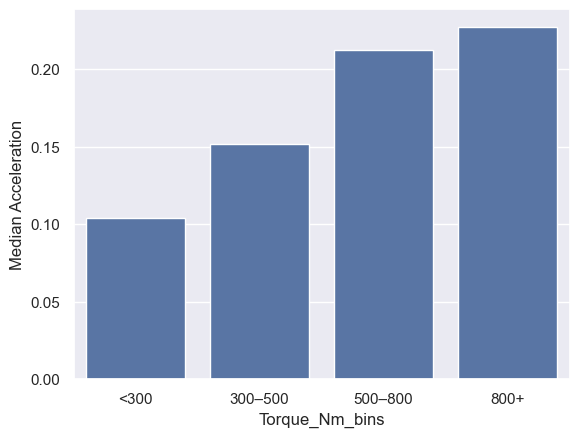

In [46]:
df_ = df.groupby(by="Torque_Nm_bins", observed=False)["Acceleration"].median().reset_index(name="Median Acceleration")
sns.barplot(data=df_, x="Torque_Nm_bins", y="Median Acceleration")

<div style="background-color: blue; padding: 10px;">
<h2 style ='color: white;'> 4. Ranking Analysis </h2>
</div>

### A. Which companies have the most expensive cars?

In [49]:
df.groupby(by="Company")["Price_USD"].max().sort_values(ascending=False).head()

Company
BUGATTI         18000000.0
MAZDA            5000000.0
LAMBORGHINI      4500000.0
ASTON MARTIN     3200000.0
FERRARI          1700000.0
Name: Price_USD, dtype: float64

In [50]:
df.groupby(by="Company")["Price_USD"].max().nlargest(n=5)

Company
BUGATTI         18000000.0
MAZDA            5000000.0
LAMBORGHINI      4500000.0
ASTON MARTIN     3200000.0
FERRARI          1700000.0
Name: Price_USD, dtype: float64

### B. What are the top 10 fastest accelerating cars (lowest 0–100 km/h time)?

In [52]:
df["Time_0_to_100_kmph_sec"]

0        2.5
1        5.3
2        3.2
3        3.6
4        2.9
        ... 
1179    14.5
1180    12.0
1181     8.0
1182     3.5
1183     6.8
Name: Time_0_to_100_kmph_sec, Length: 1184, dtype: float64

In [53]:
df.groupby(by="CarName")["Time_0_to_100_kmph_sec"].min().nsmallest(n=10)

CarName
Bolide                  2.2
Chiron Pur Sport        2.3
Centodieci              2.4
Chiron Sport            2.4
Chiron Super Sport      2.4
Divo                    2.4
Mistral                 2.4
Chiron                  2.5
Chiron Noire            2.5
GT-R50 by Italdesign    2.5
Name: Time_0_to_100_kmph_sec, dtype: float64

### C. Rank the fuel types based on average car price.

In [55]:
df.groupby(by="FuelType")["Price_USD"].mean().round(2).sort_values().reset_index()

,FuelType,Price_USD
0,Mixed Fuel,35223.81
1,Diesel,41171.21
2,Hydrogen,46633.33
3,Electric,62971.84
4,Hybrid,130614.36
5,Petrol,159804.54
6,Plug-in Hybrid,220683.33


### D. Which cars offer the most horsepower per dollar? (Compute Horsepower/Price)

In [57]:
df["Horsepower_div"] = df["Horsepower_hp"].div(df["Price_USD"])
df.sample(5)

,Company,CarName,Horsepower_hp,MaxSpeed_kmph,Time_0_to_100_kmph_sec,Price_USD,FuelType,Seat,Torque_Nm,EngineDisplacement_cc,BatteryCapacity_kWh,Acceleration,Horsepower_hp_bins,BatteryCapacity_kWh_bins,EngineDisplacement_cc_bins,Torque_Nm_bins,Horsepower_div
1023,FORD,Transit,170.0,160.0,12.0,43455.0,Diesel,2,405.0,2000.0,NaN,0.083333,150–300,NaN,1500–2000,300–500,0.003912
25,NISSAN,MAXIMA,300.0,240.0,5.8,35000.0,Petrol,5,354.0,3498.0,NaN,0.172414,150–300,NaN,3000–4000,300–500,0.008571
1080,MITSUBISHI,Outlander LE,181.0,190.0,9.5,30000.0,Petrol,7,245.0,2500.0,NaN,0.105263,150–300,NaN,2000–3000,<300,0.006033
992,PEUGEOT,208 Sedan,100.0,190.0,11.2,22000.0,Petrol,5,205.0,1199.0,NaN,0.089286,<150,NaN,<1500,<300,0.004545
359,VOLKSWAGEN,Tiguan R-Line,190.0,250.0,4.9,45000.0,Petrol,5,420.0,1984.0,NaN,0.204082,150–300,NaN,1500–2000,300–500,0.004222


In [332]:
df.groupby(by="CarName")["Horsepower_div"].max().nlargest(n=11).reset_index()

,CarName,Horsepower_div
0,Indica V2 Xeta,0.013000
1,Indigo GLX,0.011806
2,F-150 Lightning,0.011300
3,Indica eV2,0.011290
4,CAMRY,0.011148
5,370Z,0.011067
6,Veloster,0.011000
7,Ranger,0.010800
8,Indigo eCS,0.010769
9,Colorado WT,0.010616


<div style="background-color: blue; padding: 10px;">
<h2 style ='color: white;'> 5. Contribution / Variance Analysis </h2>
</div>

### A. What percentage of total car models are contributed by each company?

In [60]:
df_ = df["Company"].value_counts().reset_index()
df_

,Company,count
0,NISSAN,158
1,VOLKSWAGEN,108
2,PORSCHE,96
3,MAZDA,86
4,KIA,70
5,CHEVROLET,58
6,MITSUBISHI,56
7,PEUGEOT,52
8,GMC,51
9,FORD,49


<Axes: xlabel='count', ylabel='Company'>

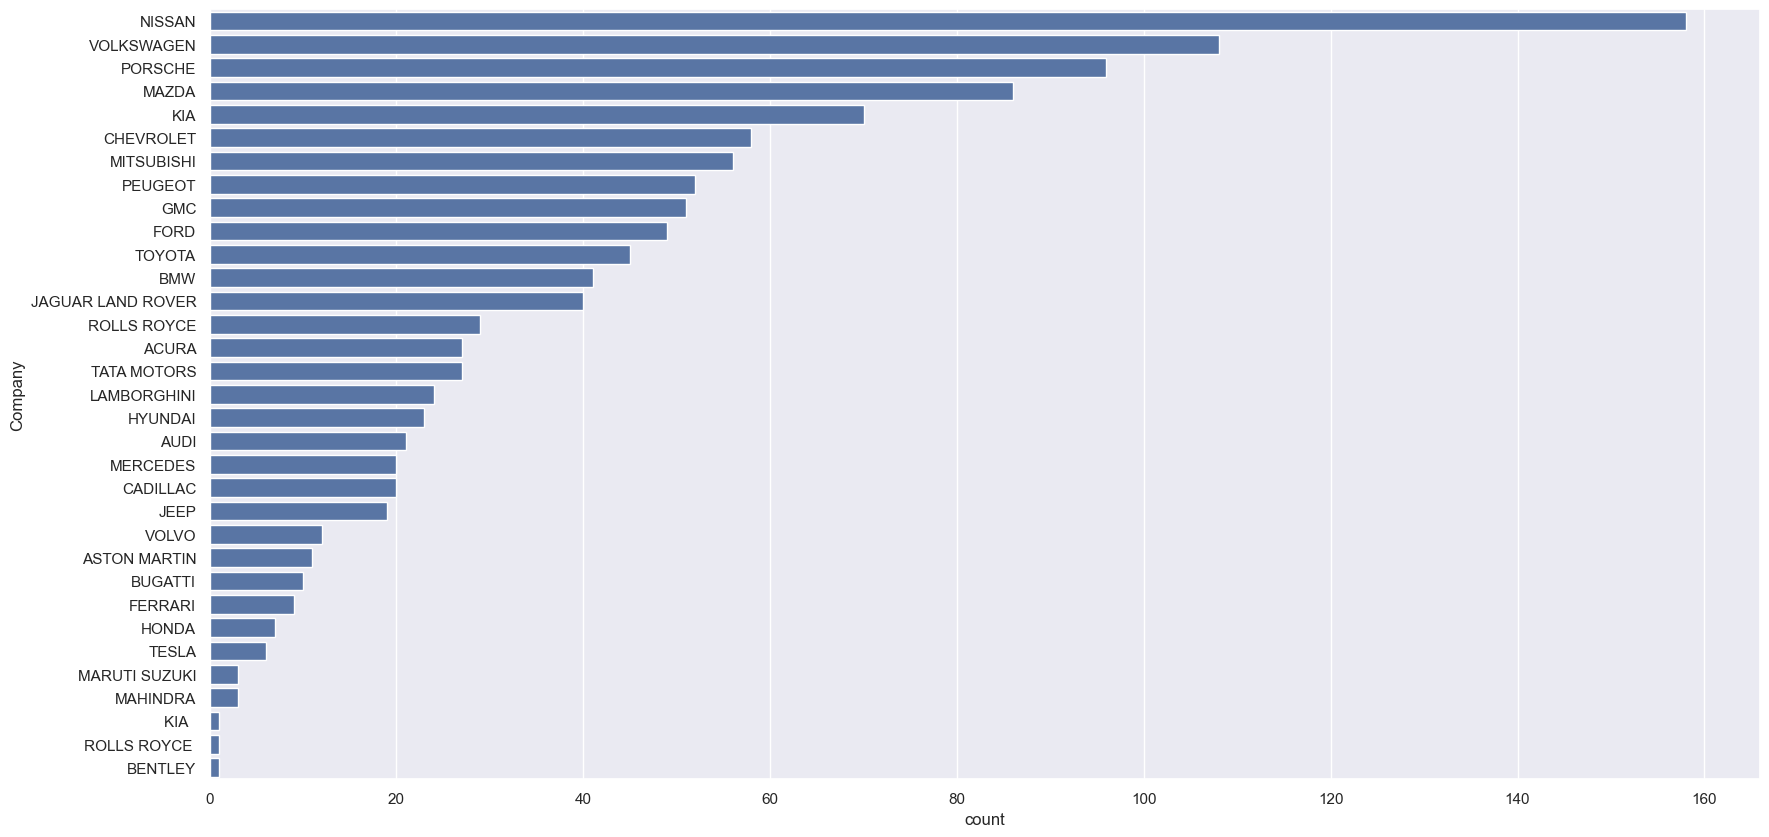

In [61]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df_, y="Company", x="count")

<Axes: xlabel='count', ylabel='Company'>

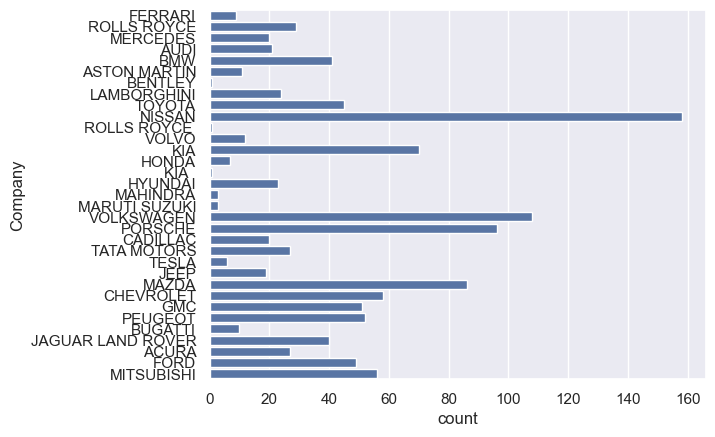

In [62]:
sns.countplot(data=df, y="Company")

### B. Which fuel type contributes most to the total horsepower in the dataset?

In [64]:
df.groupby(by="FuelType")["Horsepower_hp"].sum().sort_values(ascending=False)

FuelType
Petrol            269988.0
Hybrid             30868.0
Electric           26014.0
Diesel             19322.0
Mixed Fuel          4087.0
Plug-in Hybrid      2291.0
Hydrogen             464.0
Name: Horsepower_hp, dtype: float64

### C. What is the price contribution of electric cars compared to others?

In [66]:
df["FuelType"].unique()

array(['Plug-in Hybrid', 'Petrol', 'Diesel', 'Hybrid', 'Electric',
       'Mixed Fuel', 'Hydrogen'], dtype=object)

In [67]:
price_ele = df[df["FuelType"] == "Electric"]["Price_USD"].sum()
price_tot = df["Price_USD"].sum()
 
round(100*(price_ele/price_tot), 2)

3.03

In [68]:
df.groupby("FuelType")["Price_USD"].sum().div(df["Price_USD"].sum()).mul(100).round(2)

FuelType
Diesel             2.48
Electric           3.03
Hybrid             8.11
Hydrogen           0.09
Mixed Fuel         0.45
Petrol            85.04
Plug-in Hybrid     0.81
Name: Price_USD, dtype: float64

### D. How much does the average price of each fuel type deviate from the overall mean car price?

In [70]:
df.groupby("FuelType")["Price_USD"].mean().div(df["Price_USD"].mean()).mul(100).round(2).reset_index()

,FuelType,Price_USD
0,Diesel,29.68
1,Electric,45.39
2,Hybrid,94.16
3,Hydrogen,33.62
4,Mixed Fuel,25.39
5,Petrol,115.20
6,Plug-in Hybrid,159.08


<div style="background-color: blue; padding: 10px;">
<h2 style ='color: white;'> 6. Correlation Analysis </h2>
</div>

### A. Are horsepower and torque strongly correlated?

In [73]:
df[["Horsepower_hp", "Torque_Nm"]].corr()

,Horsepower_hp,Torque_Nm
Horsepower_hp,1.000000,0.795797
Torque_Nm,0.795797,1.000000


In [74]:
df[["Horsepower_hp", "Torque_Nm", "Time_0_to_100_kmph_sec"]].corr()

,Horsepower_hp,Torque_Nm,Time_0_to_100_kmph_sec
Horsepower_hp,1.000000,0.795797,-0.677430
Torque_Nm,0.795797,1.000000,-0.418538
Time_0_to_100_kmph_sec,-0.677430,-0.418538,1.000000


In [75]:
X1 = df["Horsepower_hp"]
X2 = df["Torque_Nm"]
N = len(X1) - 1

np.cov(X1, X2)

array([[43211.30645576, 47797.08792922],
       [47797.08792922, 83483.55138105]])

In [76]:
((X1 - X1.mean())**2).sum()/N

43211.306455758386

### B. Does battery capacity correlate with car price? (Focus on Electric & Hybrid only)

In [78]:
df["FuelType"].unique()

array(['Plug-in Hybrid', 'Petrol', 'Diesel', 'Hybrid', 'Electric',
       'Mixed Fuel', 'Hydrogen'], dtype=object)

In [79]:
df_e = df[(df["FuelType"] == "Electric") | (df["FuelType"] == "Hybrid")]
df_e[["BatteryCapacity_kWh", "Price_USD"]].corr()

,BatteryCapacity_kWh,Price_USD
BatteryCapacity_kWh,1.000000,0.218645
Price_USD,0.218645,1.000000


### C. Is acceleration more influenced by torque or horsepower?

In [81]:
df[["Time_0_to_100_kmph_sec", "Horsepower_hp"]].corr()

,Time_0_to_100_kmph_sec,Horsepower_hp
Time_0_to_100_kmph_sec,1.00000,-0.67743
Horsepower_hp,-0.67743,1.00000


In [82]:
df["Acceleration"] = 1/df["Time_0_to_100_kmph_sec"]
df

,Company,CarName,Horsepower_hp,MaxSpeed_kmph,Time_0_to_100_kmph_sec,Price_USD,FuelType,Seat,Torque_Nm,EngineDisplacement_cc,BatteryCapacity_kWh,Acceleration,Horsepower_hp_bins,BatteryCapacity_kWh_bins,EngineDisplacement_cc_bins,Torque_Nm_bins,Horsepower_div
0,FERRARI,SF90 STRADALE,963.0,340.0,2.5,1100000.0,Plug-in Hybrid,2,800.0,3990.0,NaN,0.400000,500–1000,NaN,3000–4000,500–800,0.000875
1,ROLLS ROYCE,PHANTOM,563.0,250.0,5.3,460000.0,Petrol,5,900.0,6749.0,NaN,0.188679,500–1000,NaN,4000,800+,0.001224
2,MERCEDES,GT 63 S,630.0,250.0,3.2,161000.0,Petrol,4,900.0,3982.0,NaN,0.312500,500–1000,NaN,3000–4000,800+,0.003913
3,AUDI,AUDI R8 Gt,602.0,320.0,3.6,253290.0,Petrol,2,560.0,5204.0,NaN,0.277778,500–1000,NaN,4000,500–800,0.002377
4,BMW,Mclaren 720s,710.0,341.0,2.9,499000.0,Petrol,2,770.0,3994.0,NaN,0.344828,500–1000,NaN,3000–4000,500–800,0.001423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,MAZDA,Rotary Pickup,130.0,150.0,14.5,18000.0,Petrol,2,160.0,1308.0,NaN,0.068966,<150,NaN,<1500,<300,0.007222
1180,MAZDA,Luce Rotary Coupe,135.0,175.0,12.0,25000.0,Petrol,4,180.0,1308.0,NaN,0.083333,<150,NaN,<1500,<300,0.005400
1181,MAZDA,Millenia S,200.0,220.0,8.0,30000.0,Petrol,5,250.0,2500.0,NaN,0.125000,150–300,NaN,2000–3000,<300,0.006667
1182,MAZDA,787B (Race Car),700.0,320.0,3.5,5000000.0,Petrol,1,500.0,2620.0,NaN,0.285714,500–1000,NaN,2000–3000,300–500,0.000140


In [83]:
correlation = df["Acceleration"].corr(df["Horsepower_hp"])
correlation

0.8654378122476487

In [84]:
correlation = df["Acceleration"].corr(df["Torque_Nm"])
correlation

0.5652361792610477

### D. Is there any multicollinearity among features? (Use correlation heatmap, threshold = 0.7)

In [86]:
df.columns

Index(['Company', 'CarName', 'Horsepower_hp', 'MaxSpeed_kmph',
       'Time_0_to_100_kmph_sec', 'Price_USD', 'FuelType', 'Seat', 'Torque_Nm',
       'EngineDisplacement_cc', 'BatteryCapacity_kWh', 'Acceleration',
       'Horsepower_hp_bins', 'BatteryCapacity_kWh_bins',
       'EngineDisplacement_cc_bins', 'Torque_Nm_bins', 'Horsepower_div'],
      dtype='object')

In [87]:
df.dtypes

Company                         object
CarName                         object
Horsepower_hp                  float64
MaxSpeed_kmph                  float64
Time_0_to_100_kmph_sec         float64
Price_USD                      float64
FuelType                        object
Seat                             int64
Torque_Nm                      float64
EngineDisplacement_cc          float64
BatteryCapacity_kWh            float64
Acceleration                   float64
Horsepower_hp_bins            category
BatteryCapacity_kWh_bins      category
EngineDisplacement_cc_bins    category
Torque_Nm_bins                category
Horsepower_div                 float64
dtype: object

<Axes: >

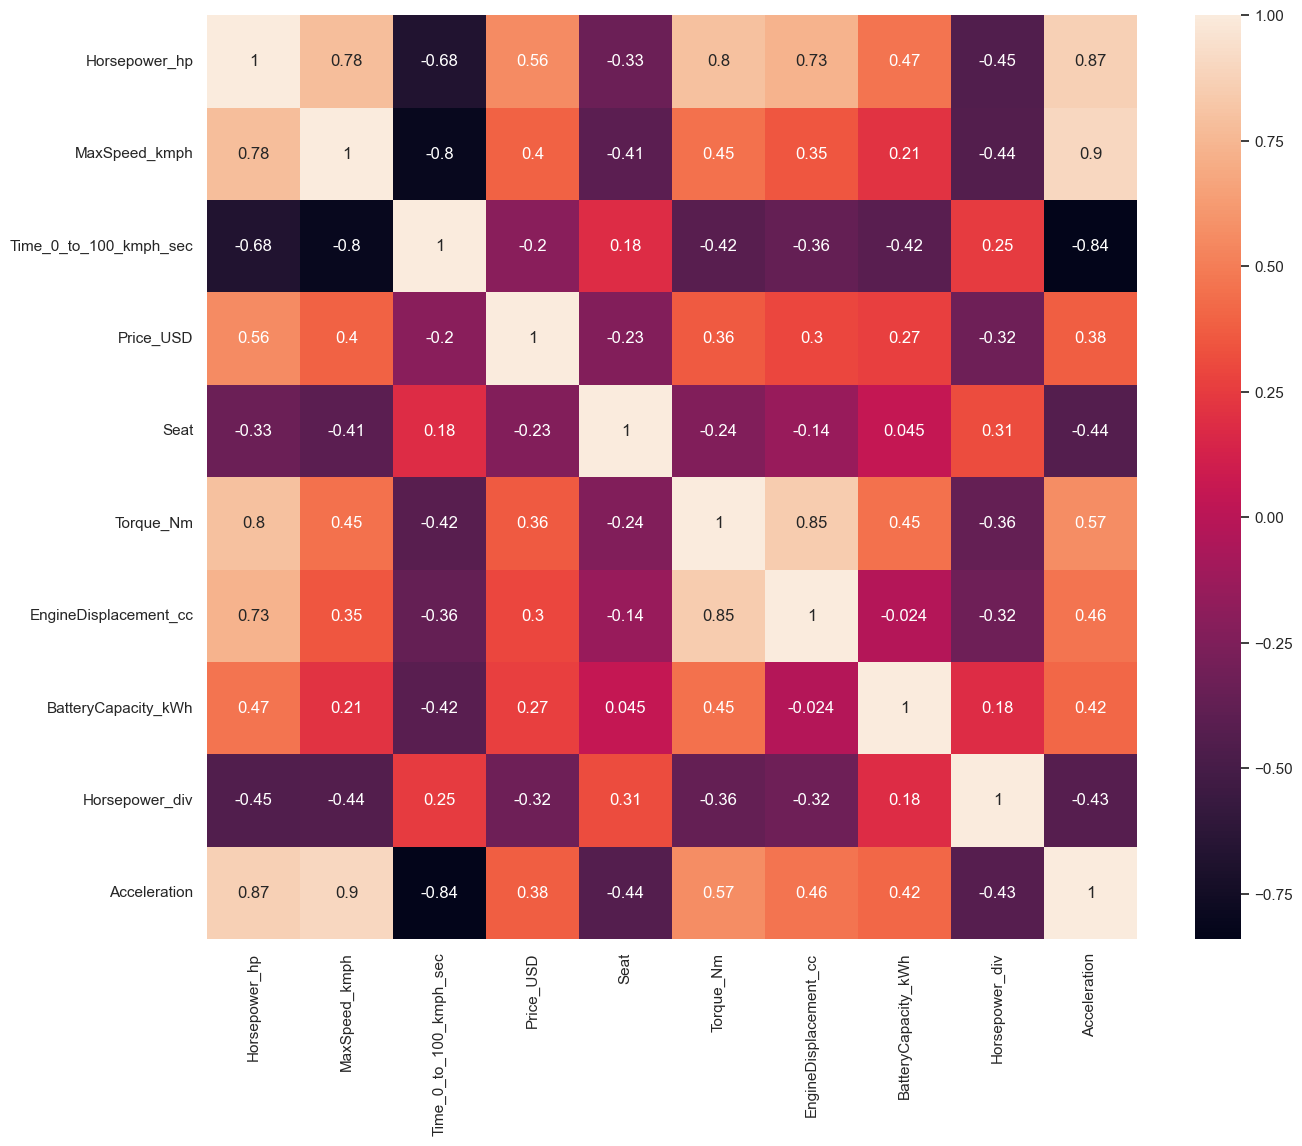

In [88]:
num_col = ['Horsepower_hp', 'MaxSpeed_kmph',
       'Time_0_to_100_kmph_sec', 'Price_USD', 'Seat', 'Torque_Nm',
       'EngineDisplacement_cc', 'BatteryCapacity_kWh',
       'Horsepower_div', 'Acceleration']

corr_mat = df[num_col].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(data=corr_mat, annot=True)

<Axes: >

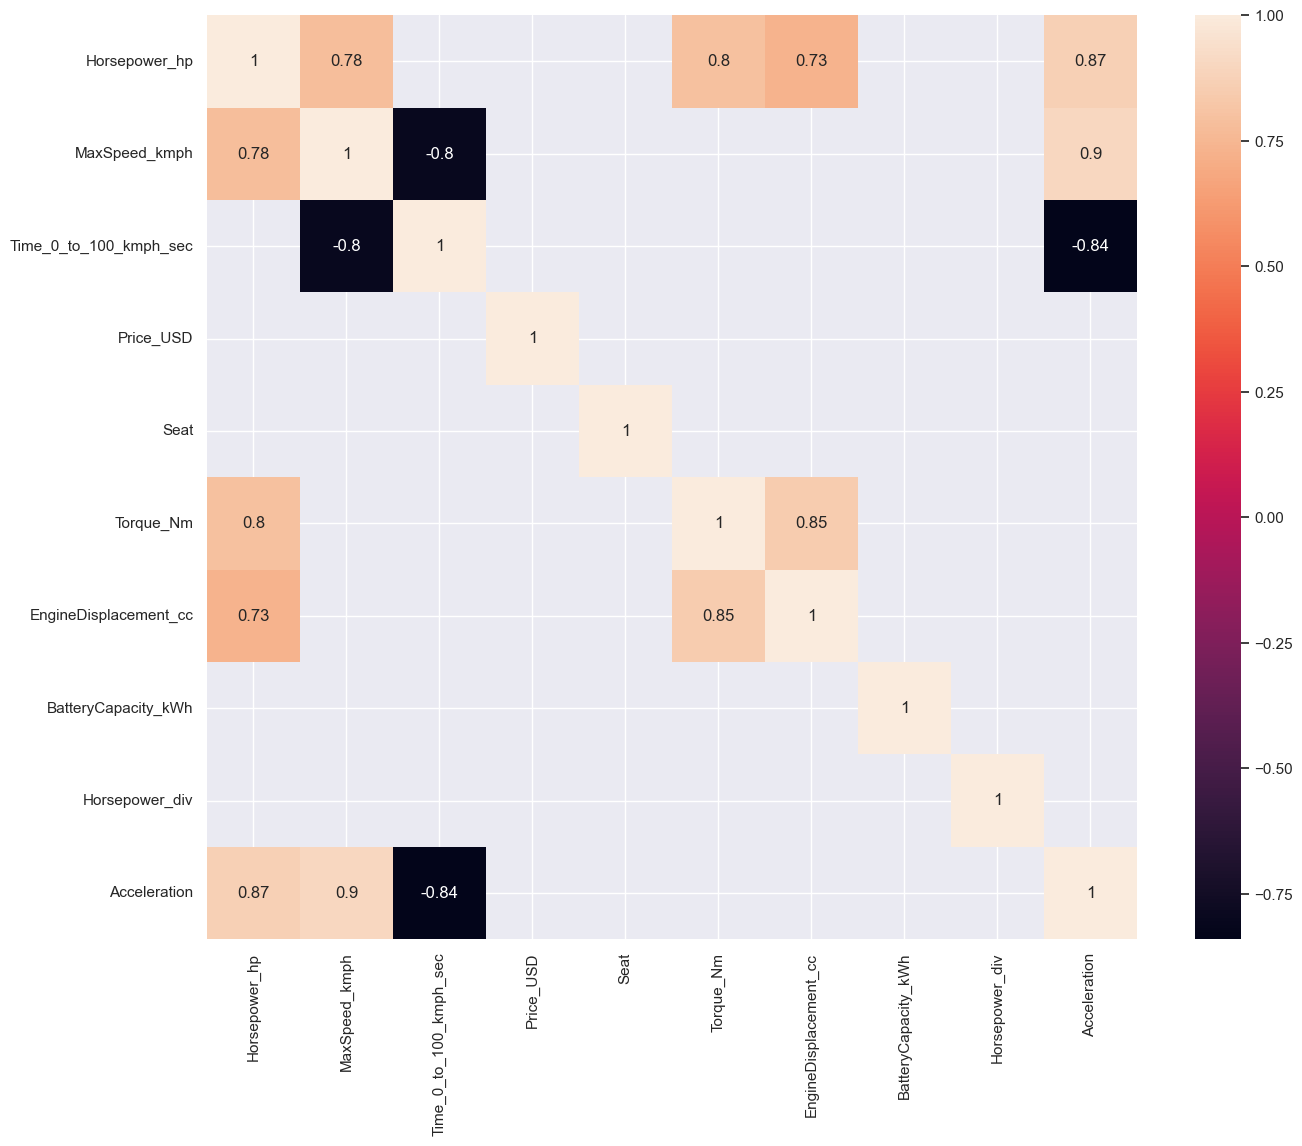

In [89]:
plt.figure(figsize=(15, 12))
mask = abs(corr_mat) > 0.7
sns.heatmap(data=corr_mat[mask], annot=True)

<div style="background-color: blue; padding: 10px;">
<h2 style ='color: white;'> 7. Frequency Analysis </h2>
</div>

### A. Count of car models by company and fuel type (stacked or grouped barplot).

<Axes: xlabel='Count of car models', ylabel='Company'>

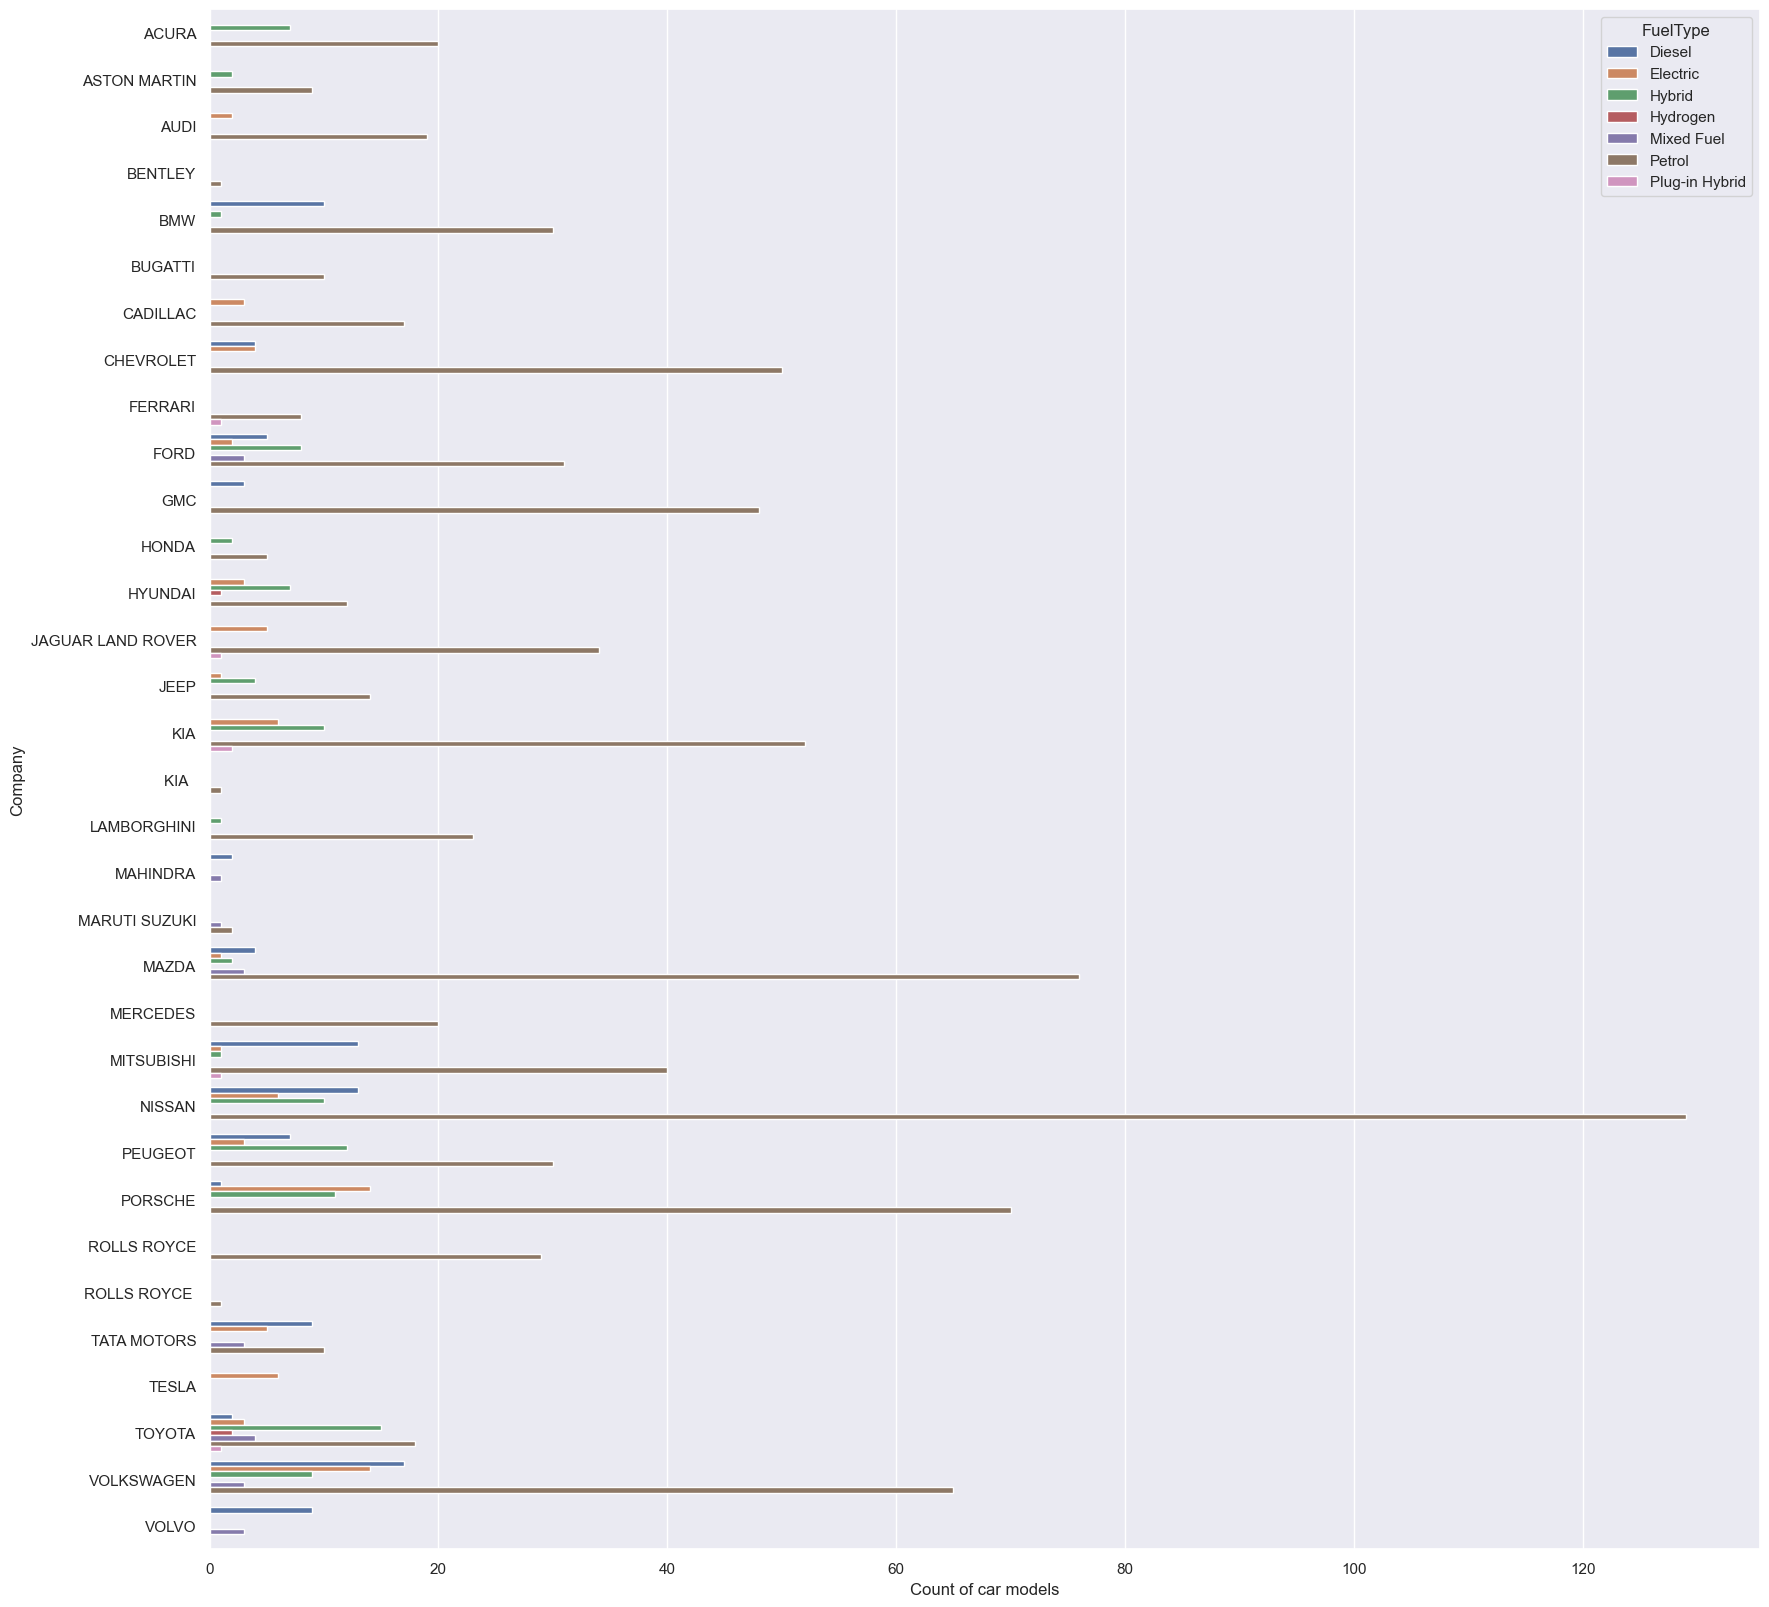

In [350]:
df_model = pd.crosstab(df["Company"], df["FuelType"], values=df["CarName"], aggfunc = "count").reset_index()
df_model_long = df_model.melt(id_vars="Company", var_name="FuelType", value_name="Count of car models")

plt.figure(figsize=(20,20))
sns.barplot(data=df_model_long, x="Count of car models", y="Company", hue="FuelType")

### B. What is the most common engine size?

<Axes: xlabel='count', ylabel='EngineDisplacement_cc_bins'>

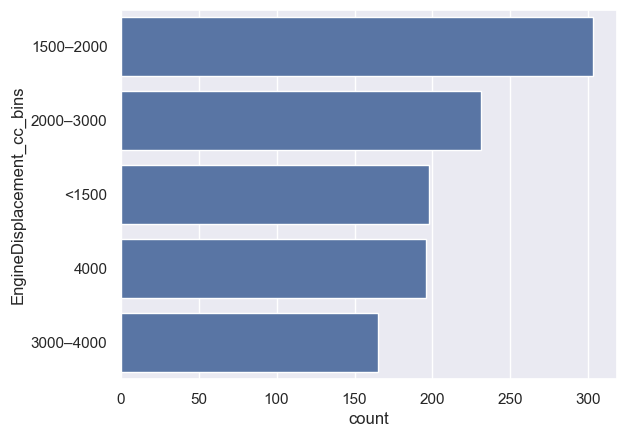

In [93]:
#plt.figure(figsize=(20,10))
sns.countplot(data=df.dropna(subset=["EngineDisplacement_cc_bins"]), y="EngineDisplacement_cc_bins", order=df["EngineDisplacement_cc_bins"].value_counts().index)

In [94]:
df_ = df.sort_values(by="EngineDisplacement_cc", ascending=False).head(10)
df_

,Company,CarName,Horsepower_hp,MaxSpeed_kmph,Time_0_to_100_kmph_sec,Price_USD,FuelType,Seat,Torque_Nm,EngineDisplacement_cc,BatteryCapacity_kWh,Acceleration,Horsepower_hp_bins,BatteryCapacity_kWh_bins,EngineDisplacement_cc_bins,Torque_Nm_bins,Horsepower_div
872,VOLVO,Volvo FH16,750.0,120.0,14.5,160000.0,Diesel,2,3500.0,16100.0,NaN,0.068966,500–1000,NaN,4000,800+,0.004687
874,VOLVO,Volvo FMX,500.0,110.0,16.5,110000.0,Diesel,2,2500.0,13000.0,NaN,0.060606,300–500,NaN,4000,800+,0.004545
871,VOLVO,Volvo FH,540.0,120.0,15.0,120000.0,Diesel,2,2600.0,13000.0,NaN,0.066667,500–1000,NaN,4000,800+,0.004500
873,VOLVO,Volvo FM,460.0,110.0,16.0,100000.0,Diesel,2,2200.0,12800.0,NaN,0.062500,300–500,NaN,4000,800+,0.004600
875,VOLVO,Volvo VNL,500.0,120.0,15.0,125000.0,Diesel,2,2400.0,12800.0,NaN,0.066667,300–500,NaN,4000,800+,0.004000
876,VOLVO,Volvo VNR,400.0,110.0,17.0,95000.0,Diesel,2,1800.0,12800.0,NaN,0.058824,300–500,NaN,4000,800+,0.004211
877,VOLVO,Volvo VHD,500.0,100.0,18.0,120000.0,Diesel,2,2500.0,12800.0,NaN,0.055556,300–500,NaN,4000,800+,0.004167
870,BUGATTI,Mistral,1600.0,420.0,2.4,5000000.0,Petrol,2,1600.0,7993.0,NaN,0.416667,1000+,NaN,4000,800+,0.000320
869,BUGATTI,Bolide,1850.0,500.0,2.2,4500000.0,Petrol,2,1600.0,7993.0,NaN,0.454545,1000+,NaN,4000,800+,0.000411
868,BUGATTI,La Voiture Noire,1500.0,420.0,2.5,18000000.0,Petrol,2,1600.0,7993.0,NaN,0.400000,1000+,NaN,4000,800+,0.000083


In [95]:
df_t = df.nlargest(columns="EngineDisplacement_cc", n=20)

<Axes: xlabel='count', ylabel='EngineDisplacement_cc'>

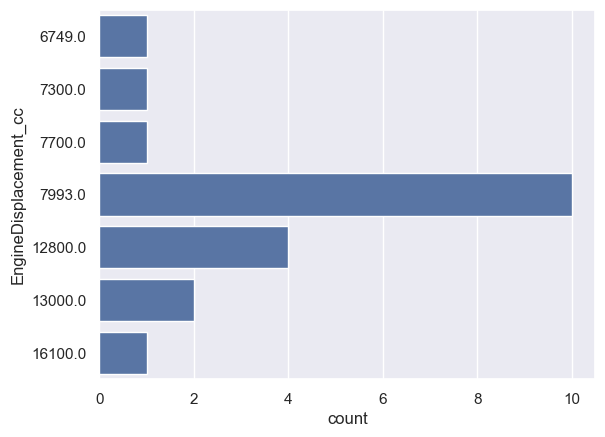

In [96]:
sns.countplot(data=df_t, y="EngineDisplacement_cc")

### C. How frequent are cars with battery capacity above a threshold (say ≥70 kWh)?

In [98]:
thre = df[df["BatteryCapacity_kWh"] >= 70]
n = round(((len(thre)/len(df["BatteryCapacity_kWh"]))*100), 2)
print(f"They represent {n}% of the dataset")

They represent 4.73% of the dataset


<div style="background-color: blue; padding: 10px;">
<h2 style ='color: white;'> 8. Pareto Analysis (80/20 Rule) </h2>
</div>

### A. Which ~20 % of companies account for 80 % of high-performance cars?

In [101]:
high_perf = df[df["Time_0_to_100_kmph_sec"] <= 10]
high_perf.head()

,Company,CarName,Horsepower_hp,MaxSpeed_kmph,Time_0_to_100_kmph_sec,Price_USD,FuelType,Seat,Torque_Nm,EngineDisplacement_cc,BatteryCapacity_kWh,Acceleration,Horsepower_hp_bins,BatteryCapacity_kWh_bins,EngineDisplacement_cc_bins,Torque_Nm_bins,Horsepower_div
0,FERRARI,SF90 STRADALE,963.0,340.0,2.5,1100000.0,Plug-in Hybrid,2,800.0,3990.0,NaN,0.400000,500–1000,NaN,3000–4000,500–800,0.000875
1,ROLLS ROYCE,PHANTOM,563.0,250.0,5.3,460000.0,Petrol,5,900.0,6749.0,NaN,0.188679,500–1000,NaN,4000,800+,0.001224
2,MERCEDES,GT 63 S,630.0,250.0,3.2,161000.0,Petrol,4,900.0,3982.0,NaN,0.312500,500–1000,NaN,3000–4000,800+,0.003913
3,AUDI,AUDI R8 Gt,602.0,320.0,3.6,253290.0,Petrol,2,560.0,5204.0,NaN,0.277778,500–1000,NaN,4000,500–800,0.002377
4,BMW,Mclaren 720s,710.0,341.0,2.9,499000.0,Petrol,2,770.0,3994.0,NaN,0.344828,500–1000,NaN,3000–4000,500–800,0.001423


In [102]:
df_ = high_perf["Company"].value_counts().div(len(high_perf)).mul(100).round(2).reset_index(name="Make %")
df_.head()

,Company,Make %
0,NISSAN,11.16
1,PORSCHE,10.11
2,VOLKSWAGEN,8.63
3,KIA,6.42
4,CHEVROLET,5.79


In [103]:
df_["Make % cumsum"] = df_["Make %"].cumsum()
df_.head()

,Company,Make %,Make % cumsum
0,NISSAN,11.16,11.16
1,PORSCHE,10.11,21.27
2,VOLKSWAGEN,8.63,29.90
3,KIA,6.42,36.32
4,CHEVROLET,5.79,42.11


In [104]:
top_comp = df_[df_["Make % cumsum"] <= 80]
top_comp

,Company,Make %,Make % cumsum
0,NISSAN,11.16,11.16
1,PORSCHE,10.11,21.27
2,VOLKSWAGEN,8.63,29.90
3,KIA,6.42,36.32
4,CHEVROLET,5.79,42.11
5,MAZDA,5.47,47.58
6,GMC,5.37,52.95
7,FORD,4.32,57.27
8,PEUGEOT,4.32,61.59
9,JAGUAR LAND ROVER,4.21,65.80


In [105]:
100*(len(top_comp)/len(df_))

45.16129032258064

80% of top vehicles are produced by 44% of companies (not 20%).

### B. Which few car models contribute most to the total price value of the dataset (80 % of total price)?

In [108]:
df_ = df.groupby(by="CarName")["Price_USD"].sum().div(df["Price_USD"].sum()).mul(100).round(2).reset_index(name="Value %")
df_.head()

,CarName,Value %
0,GT 63 S,0.10
1,100NX,0.01
2,114D,0.02
3,114D SPORT LINE,0.02
4,114i,0.02


In [109]:
df_["Value % cumsum"] = df_["Value %"].cumsum()
top = df_[df_["Value % cumsum"] <= 80]
(len(top)/len(df_))*100

70.03424657534246

### C. Which top companies dominate the electric car space (80 % of electric car total price)?

In [111]:
df["FuelType"].unique()

array(['Plug-in Hybrid', 'Petrol', 'Diesel', 'Hybrid', 'Electric',
       'Mixed Fuel', 'Hydrogen'], dtype=object)

In [112]:
df_elec = df[df["FuelType"] == "Electric"]
df_elec_star = df_elec.groupby(by="Company")["Price_USD"].sum().div(df_elec["Price_USD"].sum()).mul(100).round(2).reset_index(name="Value %")

df_elec_star["Value % cumsum"] = df_elec_star["Value %"].cumsum()
top = df_elec_star[df_elec_star["Value % cumsum"] <= 80]
top.head()

,Company,Value %,Value % cumsum
0,AUDI,3.08,3.08
1,CADILLAC,3.69,6.77
2,CHEVROLET,2.35,9.12
3,FORD,1.85,10.97
4,HYUNDAI,2.46,13.43


In [113]:
(len(top)/len(df_elec_star))*100

82.35294117647058

<div style="background-color: blue; padding: 10px;">
<h2 style ='color: white;'> 9. Extra </h2>
</div>

### A. How does the average car price vary by fuel type within each company?

In [221]:
df_grp = pd.crosstab(df["Company"], df["FuelType"], values=df["Price_USD"], aggfunc = "mean").round(2).reset_index()
df_grp

FuelType,Company,Diesel,Electric,Hybrid,Hydrogen,Mixed Fuel,Petrol,Plug-in Hybrid
0,ACURA,NaN,NaN,111142.86,NaN,NaN,46500.00,NaN
1,ASTON MARTIN,NaN,NaN,2150000.00,NaN,NaN,442493.33,NaN
2,AUDI,NaN,76500.00,NaN,NaN,NaN,83541.58,NaN
3,BENTLEY,NaN,NaN,NaN,NaN,NaN,311000.00,NaN
4,BMW,33700.00,NaN,165000.00,NaN,NaN,75266.67,NaN
5,BUGATTI,NaN,NaN,NaN,NaN,NaN,5870000.00,NaN
6,CADILLAC,NaN,61190.00,NaN,NaN,NaN,62352.94,NaN
7,CHEVROLET,56473.75,29196.25,NaN,NaN,NaN,45303.40,NaN
8,FERRARI,NaN,NaN,NaN,NaN,NaN,438750.00,1100000.0
9,FORD,41491.00,46000.00,33250.00,NaN,33333.33,58277.26,NaN


<Axes: xlabel='Average Price', ylabel='Company'>

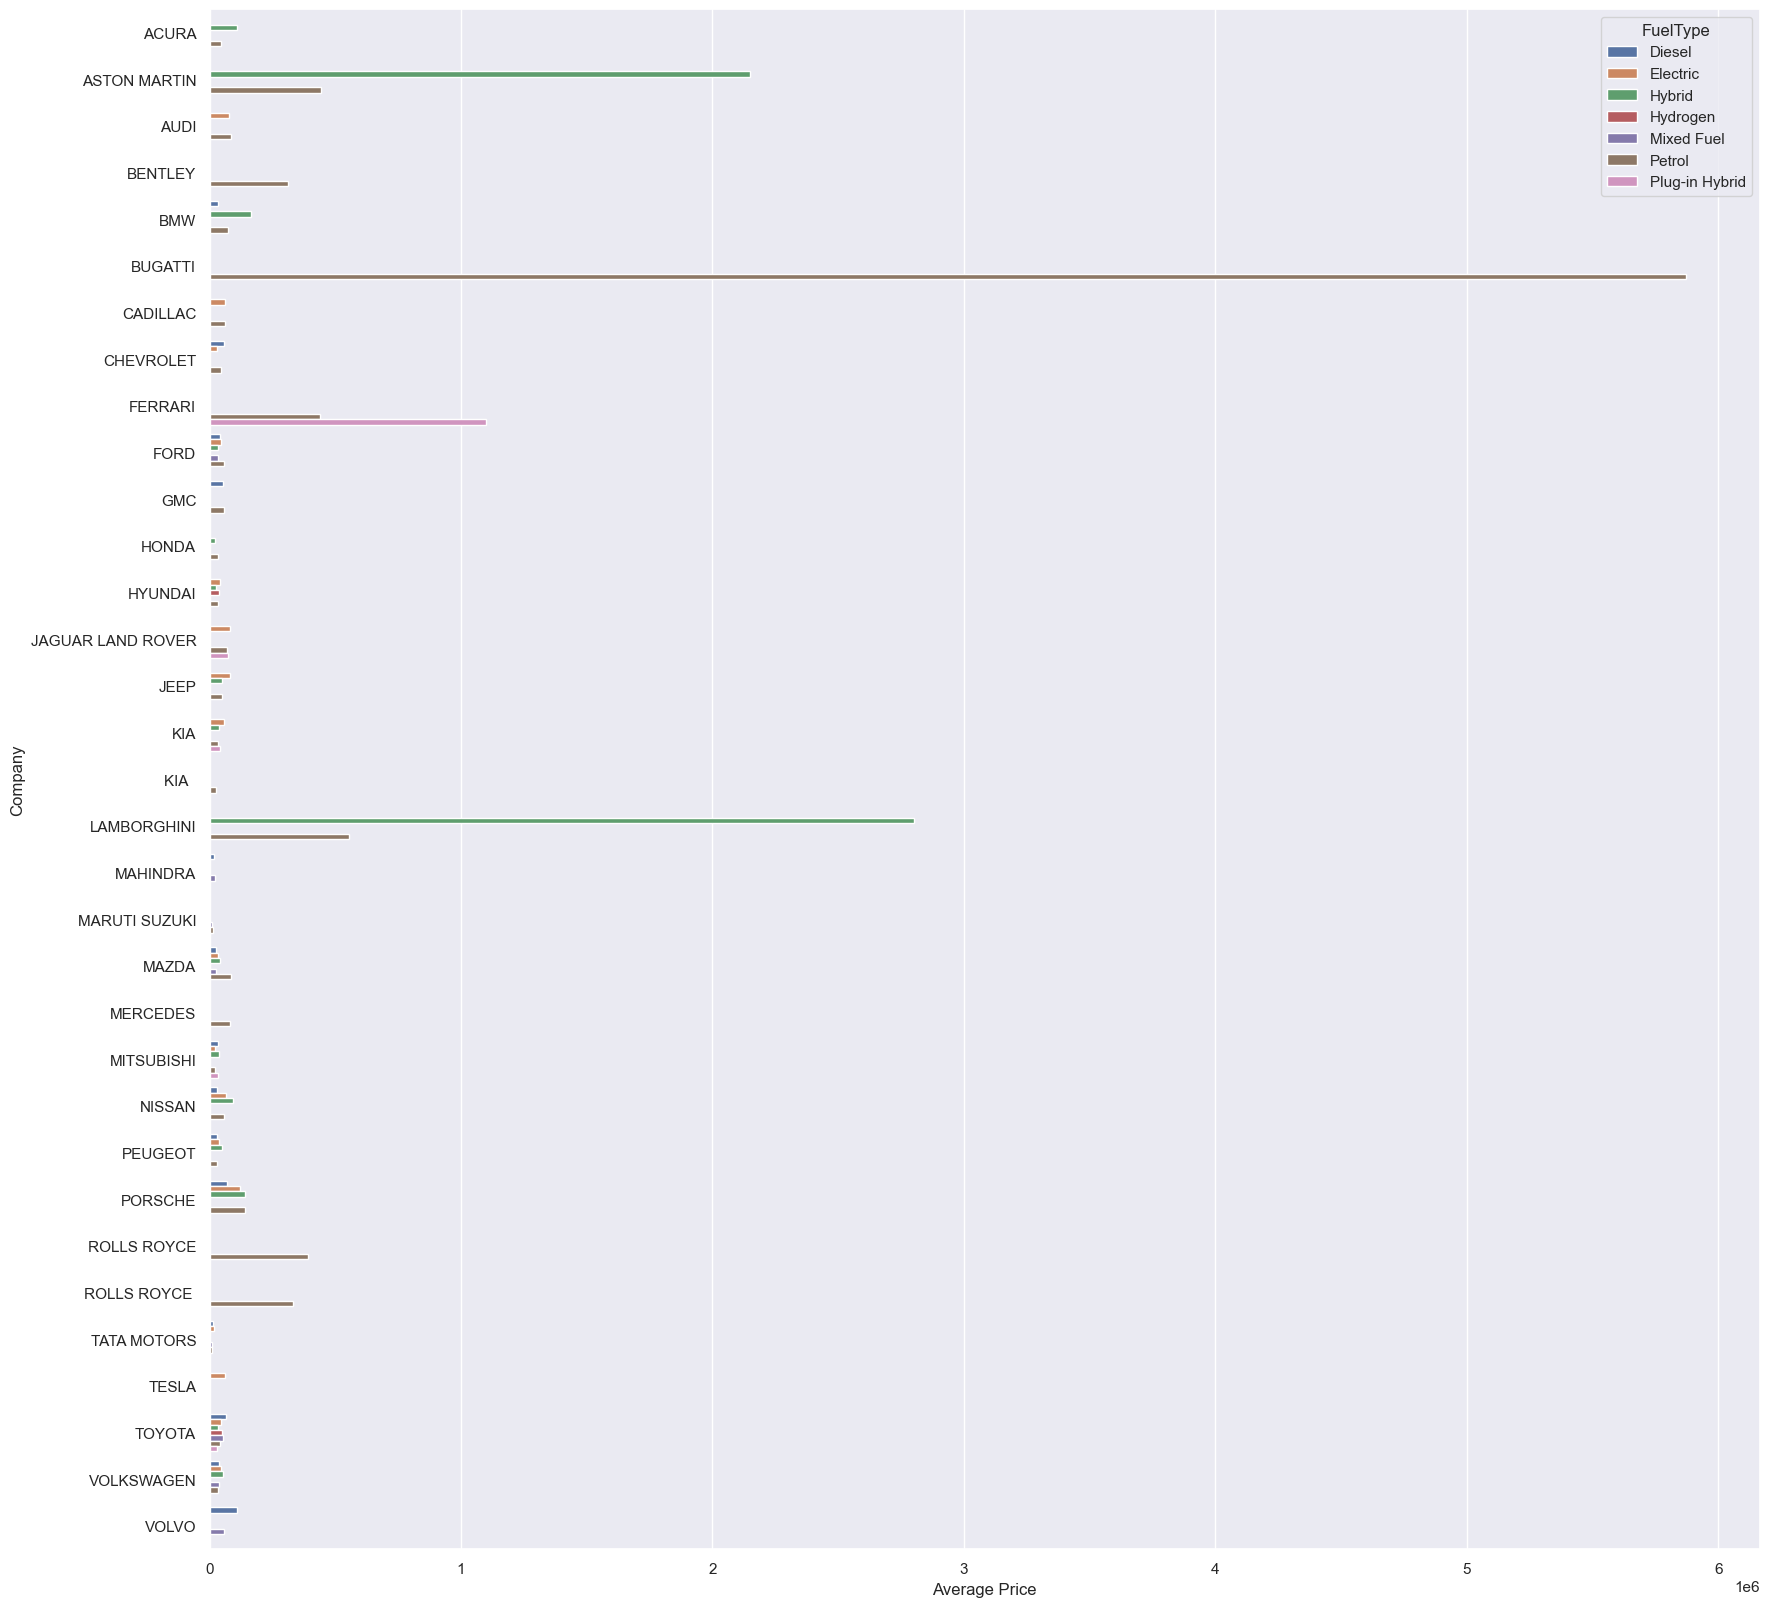

In [248]:
df_grp_long = df_grp.melt(id_vars="Company", var_name="FuelType", value_name="Average Price")

plt.figure(figsize=(20,20))
sns.barplot(data=df_grp_long, x="Average Price", y="Company", hue="FuelType")

### B. Which companies offer the most powerful electric vehicles?

In [266]:
df_elec = df[df["FuelType"] == "Electric"]

df_elec.groupby(by="Company")["Horsepower_hp"].mean().round(2).sort_values(ascending=False).reset_index()

,Company,Horsepower_hp
0,JEEP,600.00
1,PORSCHE,536.86
2,TESLA,467.17
3,AUDI,402.00
4,JAGUAR LAND ROVER,400.00
5,CADILLAC,393.33
6,NISSAN,389.00
7,FORD,359.00
8,KIA,331.17
9,HYUNDAI,248.33


### C. Compare acceleration across companies for each fuel type (use median 0–100 km/h times).

In [273]:
df_acc = pd.crosstab(df["Company"], df["FuelType"], values=df["Acceleration"], aggfunc = "median").round(2).reset_index()
df_acc

FuelType,Company,Diesel,Electric,Hybrid,Hydrogen,Mixed Fuel,Petrol,Plug-in Hybrid
0,ACURA,NaN,NaN,0.33,NaN,NaN,0.17,NaN
1,ASTON MARTIN,NaN,NaN,0.40,NaN,NaN,0.28,NaN
2,AUDI,NaN,0.18,NaN,NaN,NaN,0.19,NaN
3,BENTLEY,NaN,NaN,NaN,NaN,NaN,0.25,NaN
4,BMW,0.11,NaN,0.23,NaN,NaN,0.17,NaN
5,BUGATTI,NaN,NaN,NaN,NaN,NaN,0.42,NaN
6,CADILLAC,NaN,0.18,NaN,NaN,NaN,0.15,NaN
7,CHEVROLET,0.12,0.15,NaN,NaN,NaN,0.14,NaN
8,FERRARI,NaN,NaN,NaN,NaN,NaN,0.33,0.40
9,FORD,0.09,0.17,0.13,NaN,0.17,0.15,NaN


<Axes: xlabel='Median Acceleration', ylabel='Company'>

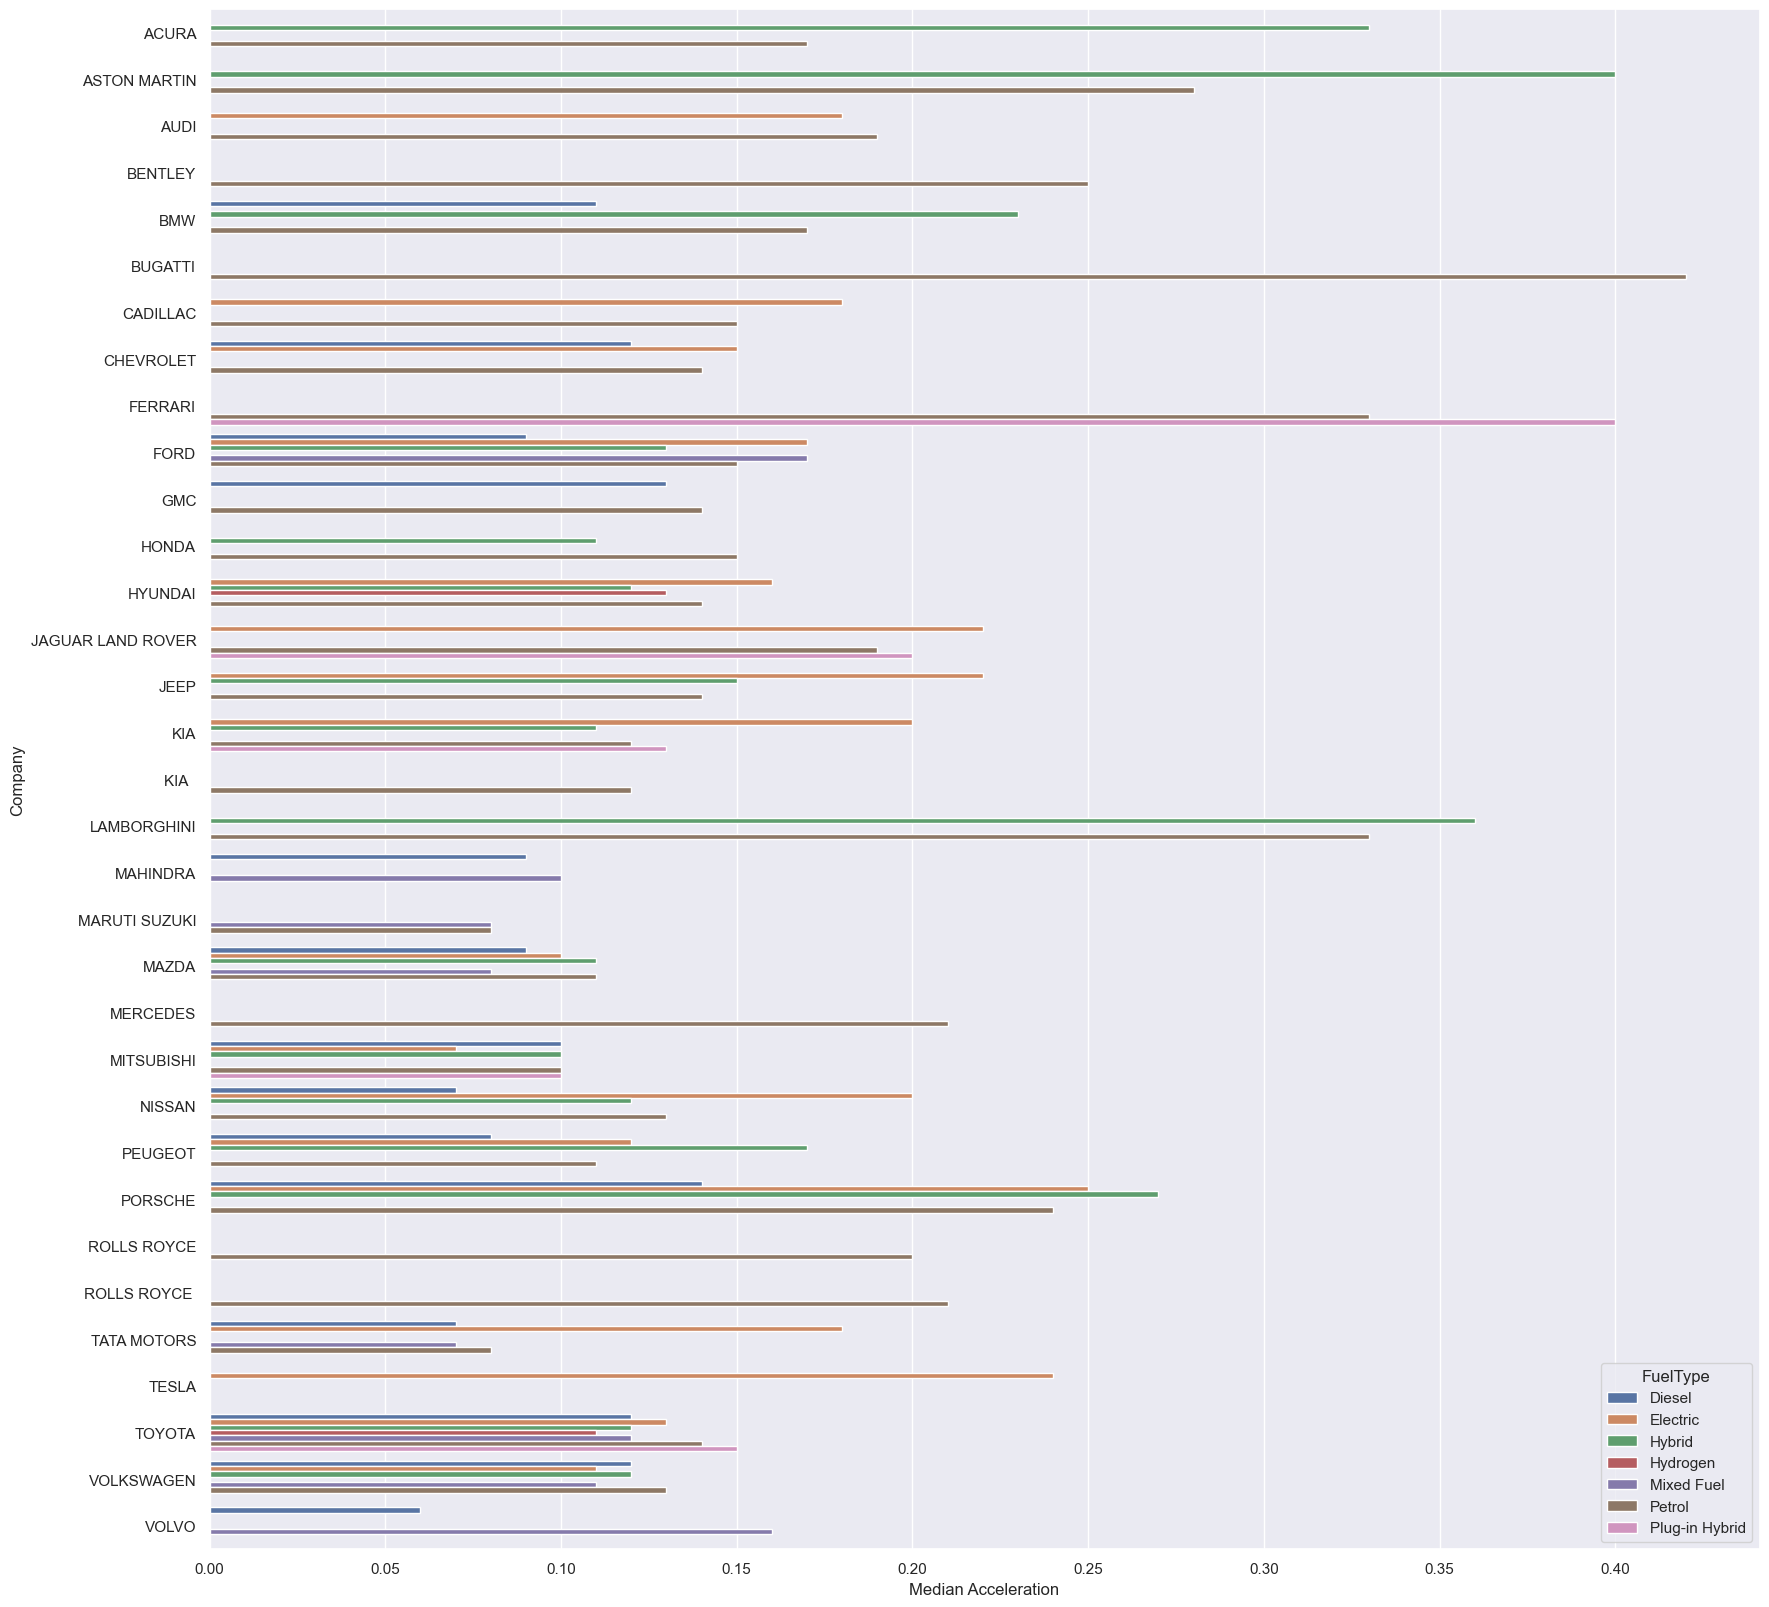

In [279]:
df_acc_long = df_acc.melt(id_vars="Company", var_name="FuelType", value_name="Median Acceleration")

plt.figure(figsize=(20,20))
sns.barplot(data=df_acc_long, x="Median Acceleration", y="Company", hue="FuelType")

### D. How does battery capacity distribution differ between electric and hybrid cars? (Use KDE and boxplot)

In [296]:
df_batt_elec = df[(df["FuelType"] == "Electric")]
df_batt_hyb = df[(df["FuelType"] == "Hybrid")]

<Axes: title={'center': 'Distribution for hybrid cars'}, xlabel='BatteryCapacity_kWh'>

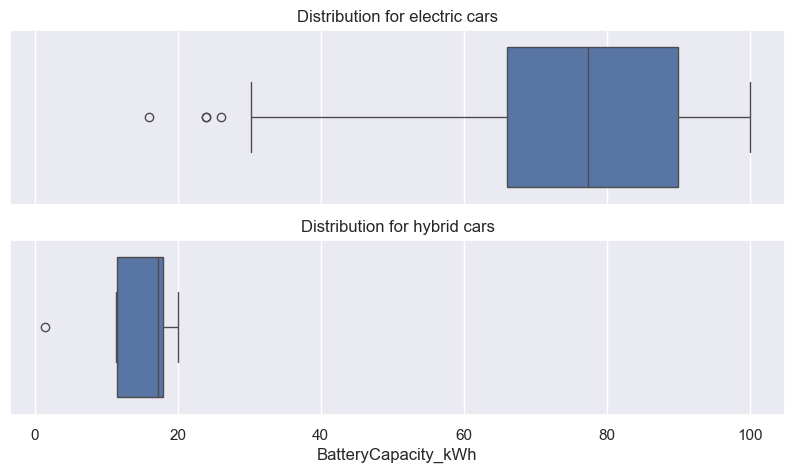

In [302]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 5))
ax[0].set_title("Distribution for electric cars")
ax[1].set_title("Distribution for hybrid cars")

sns.boxplot(data=df_batt_elec, x="BatteryCapacity_kWh", ax=ax[0])
sns.boxplot(data=df_batt_hyb, x="BatteryCapacity_kWh", ax=ax[1])

<Axes: title={'center': 'Distribution for hybrid cars'}, xlabel='BatteryCapacity_kWh', ylabel='Density'>

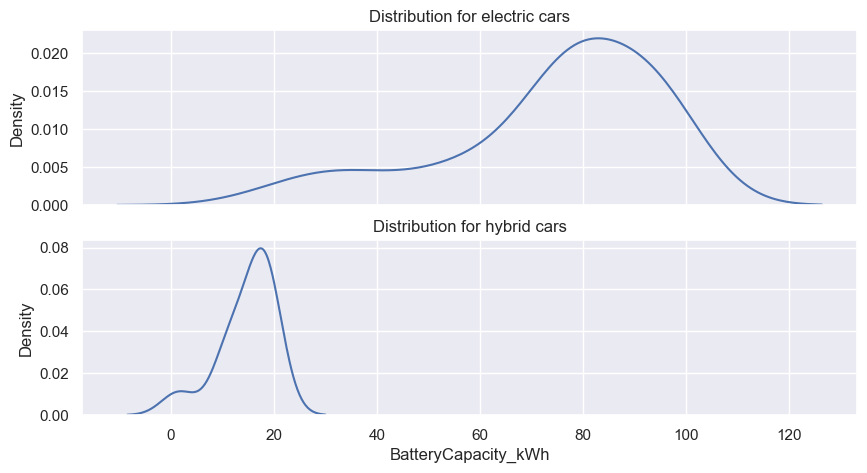

In [306]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 5))
ax[0].set_title("Distribution for electric cars")
ax[1].set_title("Distribution for hybrid cars")

sns.kdeplot(data=df_batt_elec, x="BatteryCapacity_kWh", ax=ax[0])
sns.kdeplot(data=df_batt_hyb, x="BatteryCapacity_kWh", ax=ax[1])